In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
from matplotlib import pyplot as plt

In [3]:
#adata=sc.read(results_file_post)
#adata.uns['log1p'] = {"base":None}

In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 python-igraph==0.10.4 pynndescent==0.5.12


In [5]:
#%matplotlib inline

In [6]:
writeDir = "write/"

fileName = "Data_Chen2020_Head-and-Neck"

resultsFileQC = writeDir + fileName + '_QC.h5ad' 


In [7]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

# Read In Data

In [6]:
inDir = f'data/{fileName}'

inputGenesFile = f'{inDir}/Genes.txt'
genes =  pd.read_table(inputGenesFile, delimiter=",", index_col=0, header=None)
genes.index.names = ['genes']
genes

Empty DataFrame
Columns: []
Index: [MIR1302-2HG, FAM138A, OR4F5, AL627309.1, AL627309.3, AL627309.2, AL627309.5, AL627309.4, AP006222.2, AL732372.1, OR4F29, AC114498.1, OR4F16, AL669831.2, LINC01409, FAM87B, LINC01128, LINC00115, FAM41C, AL645608.6, AL645608.2, AL645608.4, LINC02593, SAMD11, NOC2L, KLHL17, PLEKHN1, PERM1, AL645608.7, HES4, ISG15, AL645608.1, AGRN, AL645608.5, AL645608.8, RNF223, C1orf159, AL390719.3, LINC01342, AL390719.2, TTLL10-AS1, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, C1QTNF12, AL162741.1, UBE2J2, LINC01786, SCNN1D, ACAP3, PUSL1, INTS11, AL139287.1, CPTP, TAS1R3, DVL1, MXRA8, AURKAIP1, CCNL2, MRPL20-AS1, MRPL20, AL391244.2, ANKRD65, AL391244.1, TMEM88B, LINC01770, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, AL645728.1, FNDC10, AL691432.4, AL691432.2, MIB2, MMP23B, CDK11B, FO704657.1, SLC35E2B, CDK11A, SLC35E2A, NADK, GNB1, AL109917.1, CALML6, TMEM52, CFAP74, AL391845.2, GABRD, AL391845.1, PRKCZ, AL590822.2, PRKCZ-AS1, FAAP20, AL590822.1, SKI, ...]

[36695 rows x 0 columns]

In [10]:
def readAdata(inDir, sufix, genes):
    print(sufix)
    inputCellsFile = f'{inDir}/Cells{sufix}.csv'
    inputMtxFile = f'{inDir}/Exp_data_UMIcounts{sufix}.mtx'

    cells =  pd.read_table(inputCellsFile, delimiter=",", index_col=0)

    
    adata = sc.read_mtx(inputMtxFile).T
    
    adata.obs = cells
    adata.var = genes
    
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    adata = adata[adata.obs.cell_type=="Malignant"]
    return(adata)

readAdata(inDir,"",genes)

View of AnnData object with n_obs × n_vars = 3763 × 36695
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv'

In [11]:
adata = readAdata(inDir,"",genes)
adata

View of AnnData object with n_obs × n_vars = 3763 × 36695
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv'

In [8]:
inMetaFile = f'{inDir}/Meta-data.csv'
meta =  pd.read_table(inMetaFile, delimiter=",", index_col=0, header=0)
meta

technology  n_cells patient               cancer_type sex  age  \
sample                                                                  
P01           10x     4335     P01  Nasopharyngeal Carcinoma   M   37   
P02           10x     5002     P02  Nasopharyngeal Carcinoma   F   38   
P03           10x     6582     P03  Nasopharyngeal Carcinoma   F   31   
P04           10x     1543     P04  Nasopharyngeal Carcinoma   M   58   
P05           10x     4880     P05  Nasopharyngeal Carcinoma   M   74   
P06           10x     4582     P06  Nasopharyngeal Carcinoma   F   36   
P07           10x     1199     P07  Nasopharyngeal Carcinoma   M   45   
P08           10x     4788     P08  Nasopharyngeal Carcinoma   M   61   
P09           10x     2159     P09  Nasopharyngeal Carcinoma   M   51   
P10           10x     2295     P10  Nasopharyngeal Carcinoma   M   57   
P11           10x     6890     P11  Nasopharyngeal Carcinoma   M   44   
P12           10x     5979     P12  Nasopharyngeal Carcinoma   M   32   
P14           10x    12853     P14  Nasopharyngeal Carcinoma   F   54   
P15           10x     8809     P15  Nasopharyngeal Carcinoma   M   32   

       smoking_status  PY diagnosis_recurrence disease_extent  ...  \
sample                                                         ...   
P01               Yes NaN            diagnosis  node positive  ...   
P02                No NaN            diagnosis  node positive  ...   
P03                No NaN            diagnosis  node positive  ...   
P04               Yes NaN            diagnosis     metastatic  ...   
P05                No NaN            diagnosis          local  ...   
P06                No NaN            diagnosis          local  ...   
P07                No NaN            diagnosis  node positive  ...   
P08               Yes NaN            diagnosis  node positive  ...   
P09                No NaN            diagnosis  node positive  ...   
P10               Yes NaN            diagnosis  node positive  ...   
P11               Yes NaN            diagnosis  node positive  ...   
P12                No NaN            diagnosis  node positive  ...   
P14                No NaN            diagnosis     metastatic  ...   
P15                No NaN            diagnosis          local  ...   

       targeted_rx_response  ICB_exposed ICB_response   ET_exposed  \
sample                                                               
P01             not exposed  not exposed  not exposed  not exposed   
P02             not exposed  not exposed  not exposed  not exposed   
P03             not exposed  not exposed  not exposed  not exposed   
P04             not exposed  not exposed  not exposed  not exposed   
P05             not exposed  not exposed  not exposed  not exposed   
P06             not exposed  not exposed  not exposed  not exposed   
P07             not exposed  not exposed  not exposed  not exposed   
P08             not exposed  not exposed  not exposed  not exposed   
P09             not exposed  not exposed  not exposed  not exposed   
P10             not exposed  not exposed  not exposed  not exposed   
P11             not exposed  not exposed  not exposed  not exposed   
P12             not exposed  not exposed  not exposed  not exposed   
P14             not exposed  not exposed  not exposed  not exposed   
P15             not exposed  not exposed  not exposed  not exposed   

        ET_response  time_end_of_rx_to_sampling post_sampling_rx_exposed  \
sample                                                                     
P01     not exposed                 not exposed                      NaN   
P02     not exposed                 not exposed                      NaN   
P03     not exposed                 not exposed                      NaN   
P04     not exposed                 not exposed                      NaN   
P05     not exposed                 not exposed                      NaN   
P06     not exposed                 not exposed                 

In [9]:
meta.iloc[:,10:20]

AJCC_T AJCC_N AJCC_M AJCC_stage sample_primary_met  size          site  \
sample                                                                          
P01        T3     N1     M0        III            primary   NaN  nasopharynx    
P02        T2     N3     M0        IVA            primary   NaN  nasopharynx    
P03        T1     N2     M0        III            primary   NaN  nasopharynx    
P04        T4     N3     M1        IVB            primary   NaN  nasopharynx    
P05        T3     N0     M0        III            primary   NaN  nasopharynx    
P06        T2     N2     M0        III            primary   NaN  nasopharynx    
P07        T3     N1     M0        III            primary   NaN  nasopharynx    
P08        T2     N1     M0         II            primary   NaN  nasopharynx    
P09        T2     N3     M0        IVA            primary   NaN  nasopharynx    
P10        T4     N1     M0        IVA            primary   NaN  nasopharynx    
P11        T1     N1     M0         II            primary   NaN  nasopharynx    
P12        T4     N2     M0        IVA            primary   NaN  nasopharynx    
P14        T4     N2     M1        IVB            primary   NaN  nasopharynx    
P15        T2     N0     M0         II            primary   NaN  nasopharynx    

       histology  genetic_hormonal_features  grade  
sample                                              
P01       NKNPC                         NaN    NaN  
P02       NKNPC                         NaN    NaN  
P03       NKNPC                         NaN    NaN  
P04       NKNPC                         NaN    NaN  
P05       NKNPC                         NaN    NaN  
P06       NKNPC                         NaN    NaN  
P07       NKNPC                         NaN    NaN  
P08       NKNPC                         NaN    NaN  
P09       NKNPC                         NaN    NaN  
P10       NKNPC                         NaN    NaN  
P11       NKNPC                         NaN    NaN  
P12       NKNPC                         NaN    NaN  
P14       NKNPC                         NaN    NaN  
P15       NKNPC                         NaN    NaN

# QC

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


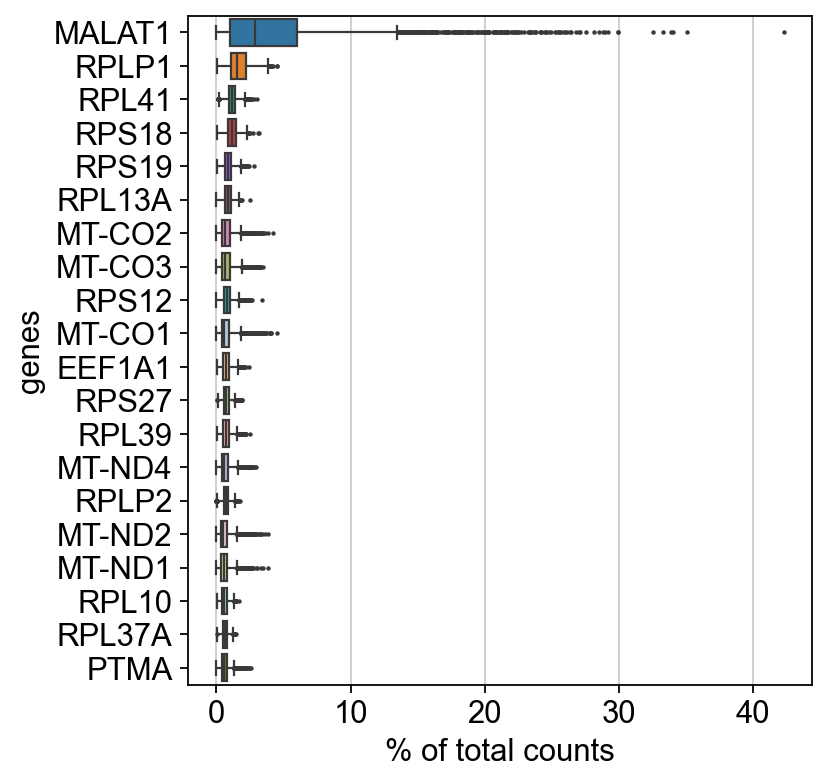

In [12]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/tmp/ipykernel_3496418/3542297969.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


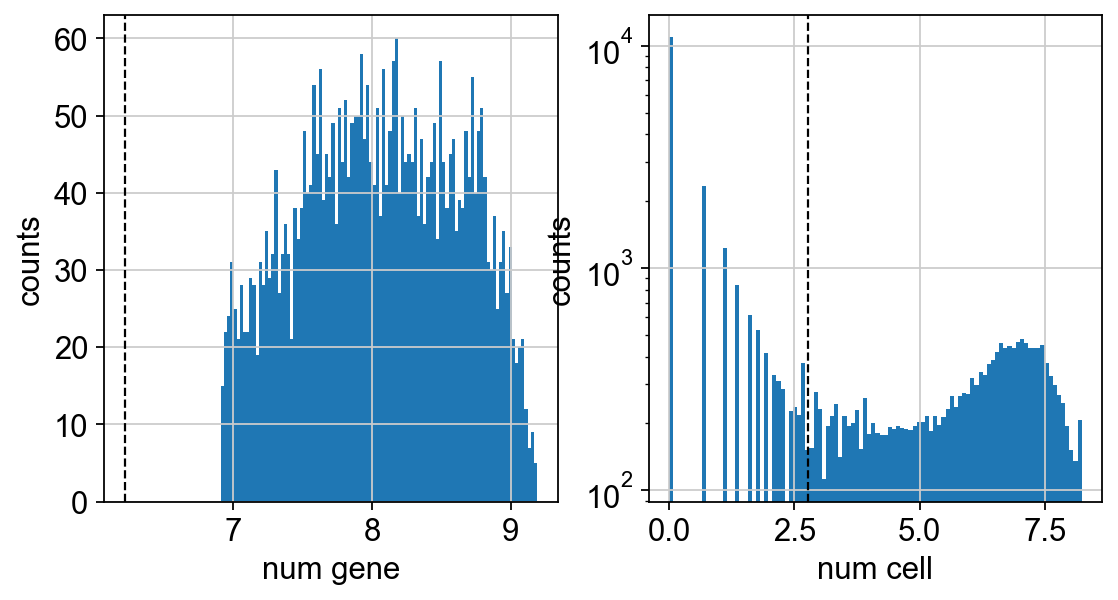

In [13]:
valX = adata.X>0
minGenes=500
minCells=15

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [14]:
sc.pp.filter_cells(adata, min_genes = minGenes)
sc.pp.filter_genes(adata, min_cells = minCells)

filtered out 18869 genes that are detected in less than 15 cells


In [15]:
adata = adata[:,np.logical_not(adata.var_names=="MALAT1")]

## Mito QC

In [16]:
for g in adata.var_names:
    if "MT-" == g[:2]:
        print(g)

In [17]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], log1p = False, inplace=True)

/tmp/ipykernel_3496418/2933791377.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var_names.str.startswith('MT-')


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


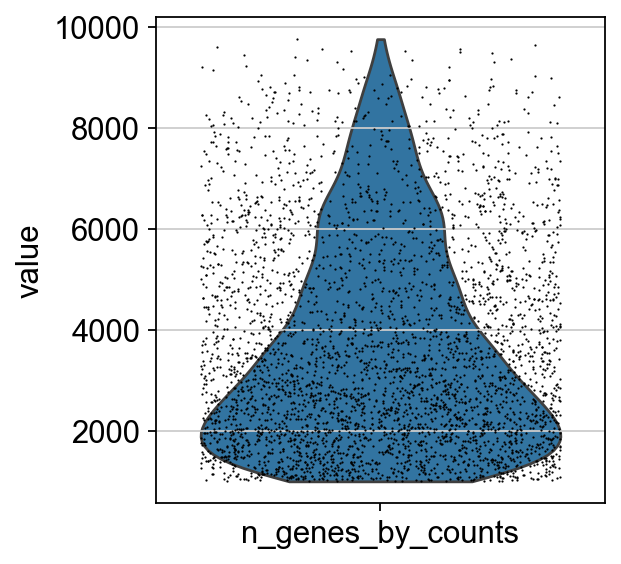

In [18]:
sc.pl.violin(adata, ['n_genes_by_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


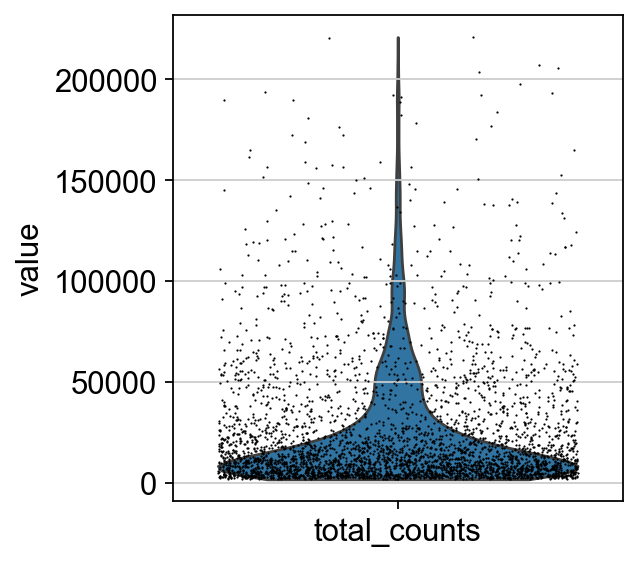

In [19]:
sc.pl.violin(adata, ['total_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


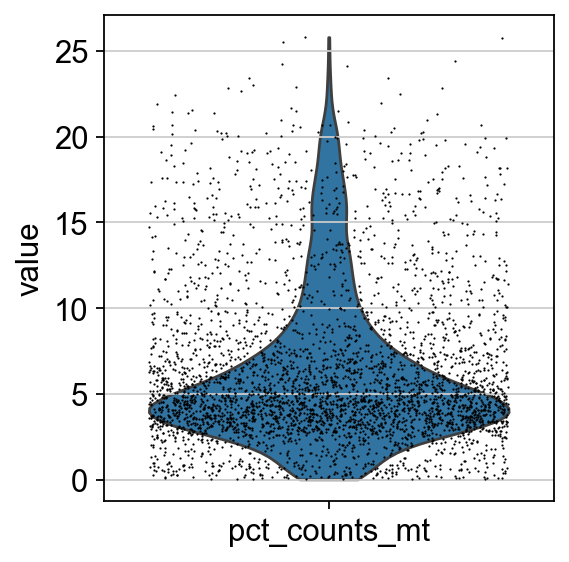

In [20]:
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4)

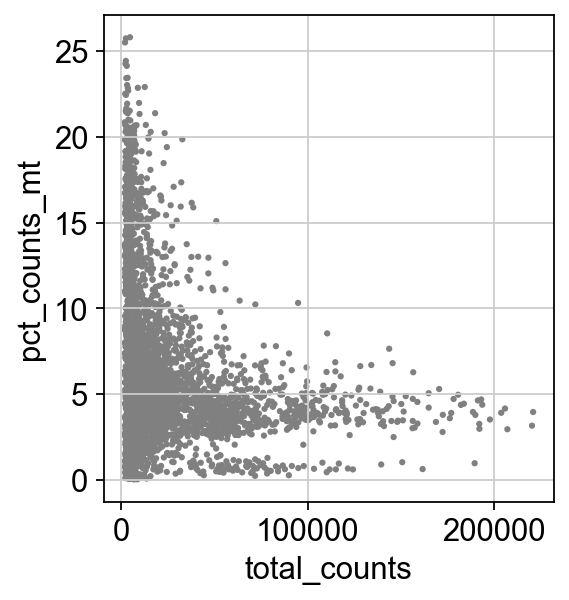

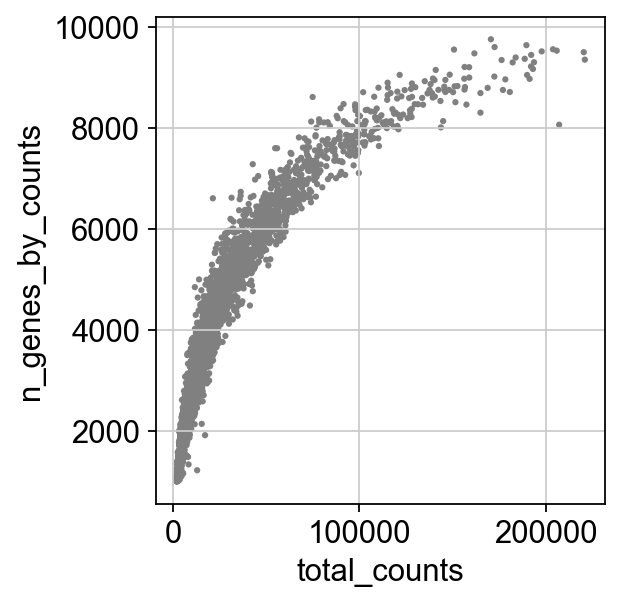

In [21]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [22]:
adata = adata[adata.obs.n_genes_by_counts < 8000, :]
adata = adata[adata.obs.total_counts < 50000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]

save post QC scanpy

In [23]:
adata

View of AnnData object with n_obs × n_vars = 3152 × 17825
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [24]:
resultsFileQC

'write/Data_Chen2020_Head-and-Neck_QC.h5ad'

In [25]:
adata.write(resultsFileQC)

# Analysis

In [26]:
resultsFile = writeDir + fileName + '.h5ad'       # final output
resultsFileQC = writeDir + fileName + '_QC.h5ad'  # post QC (pre-analysis) 

Set figure parameters

In [27]:
sc.set_figure_params(scanpy=True, dpi=200, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

In [28]:
adata = sc.read(resultsFileQC)
adata

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 3152 × 17825
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [29]:
sc.pp.normalize_total(adata,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [30]:
sc.pp.log1p(adata)

In [31]:
sc.pp.highly_variable_genes(adata)#, flavor = "seurat", n_top_genes=2000)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


extracting highly variable genes


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
1940


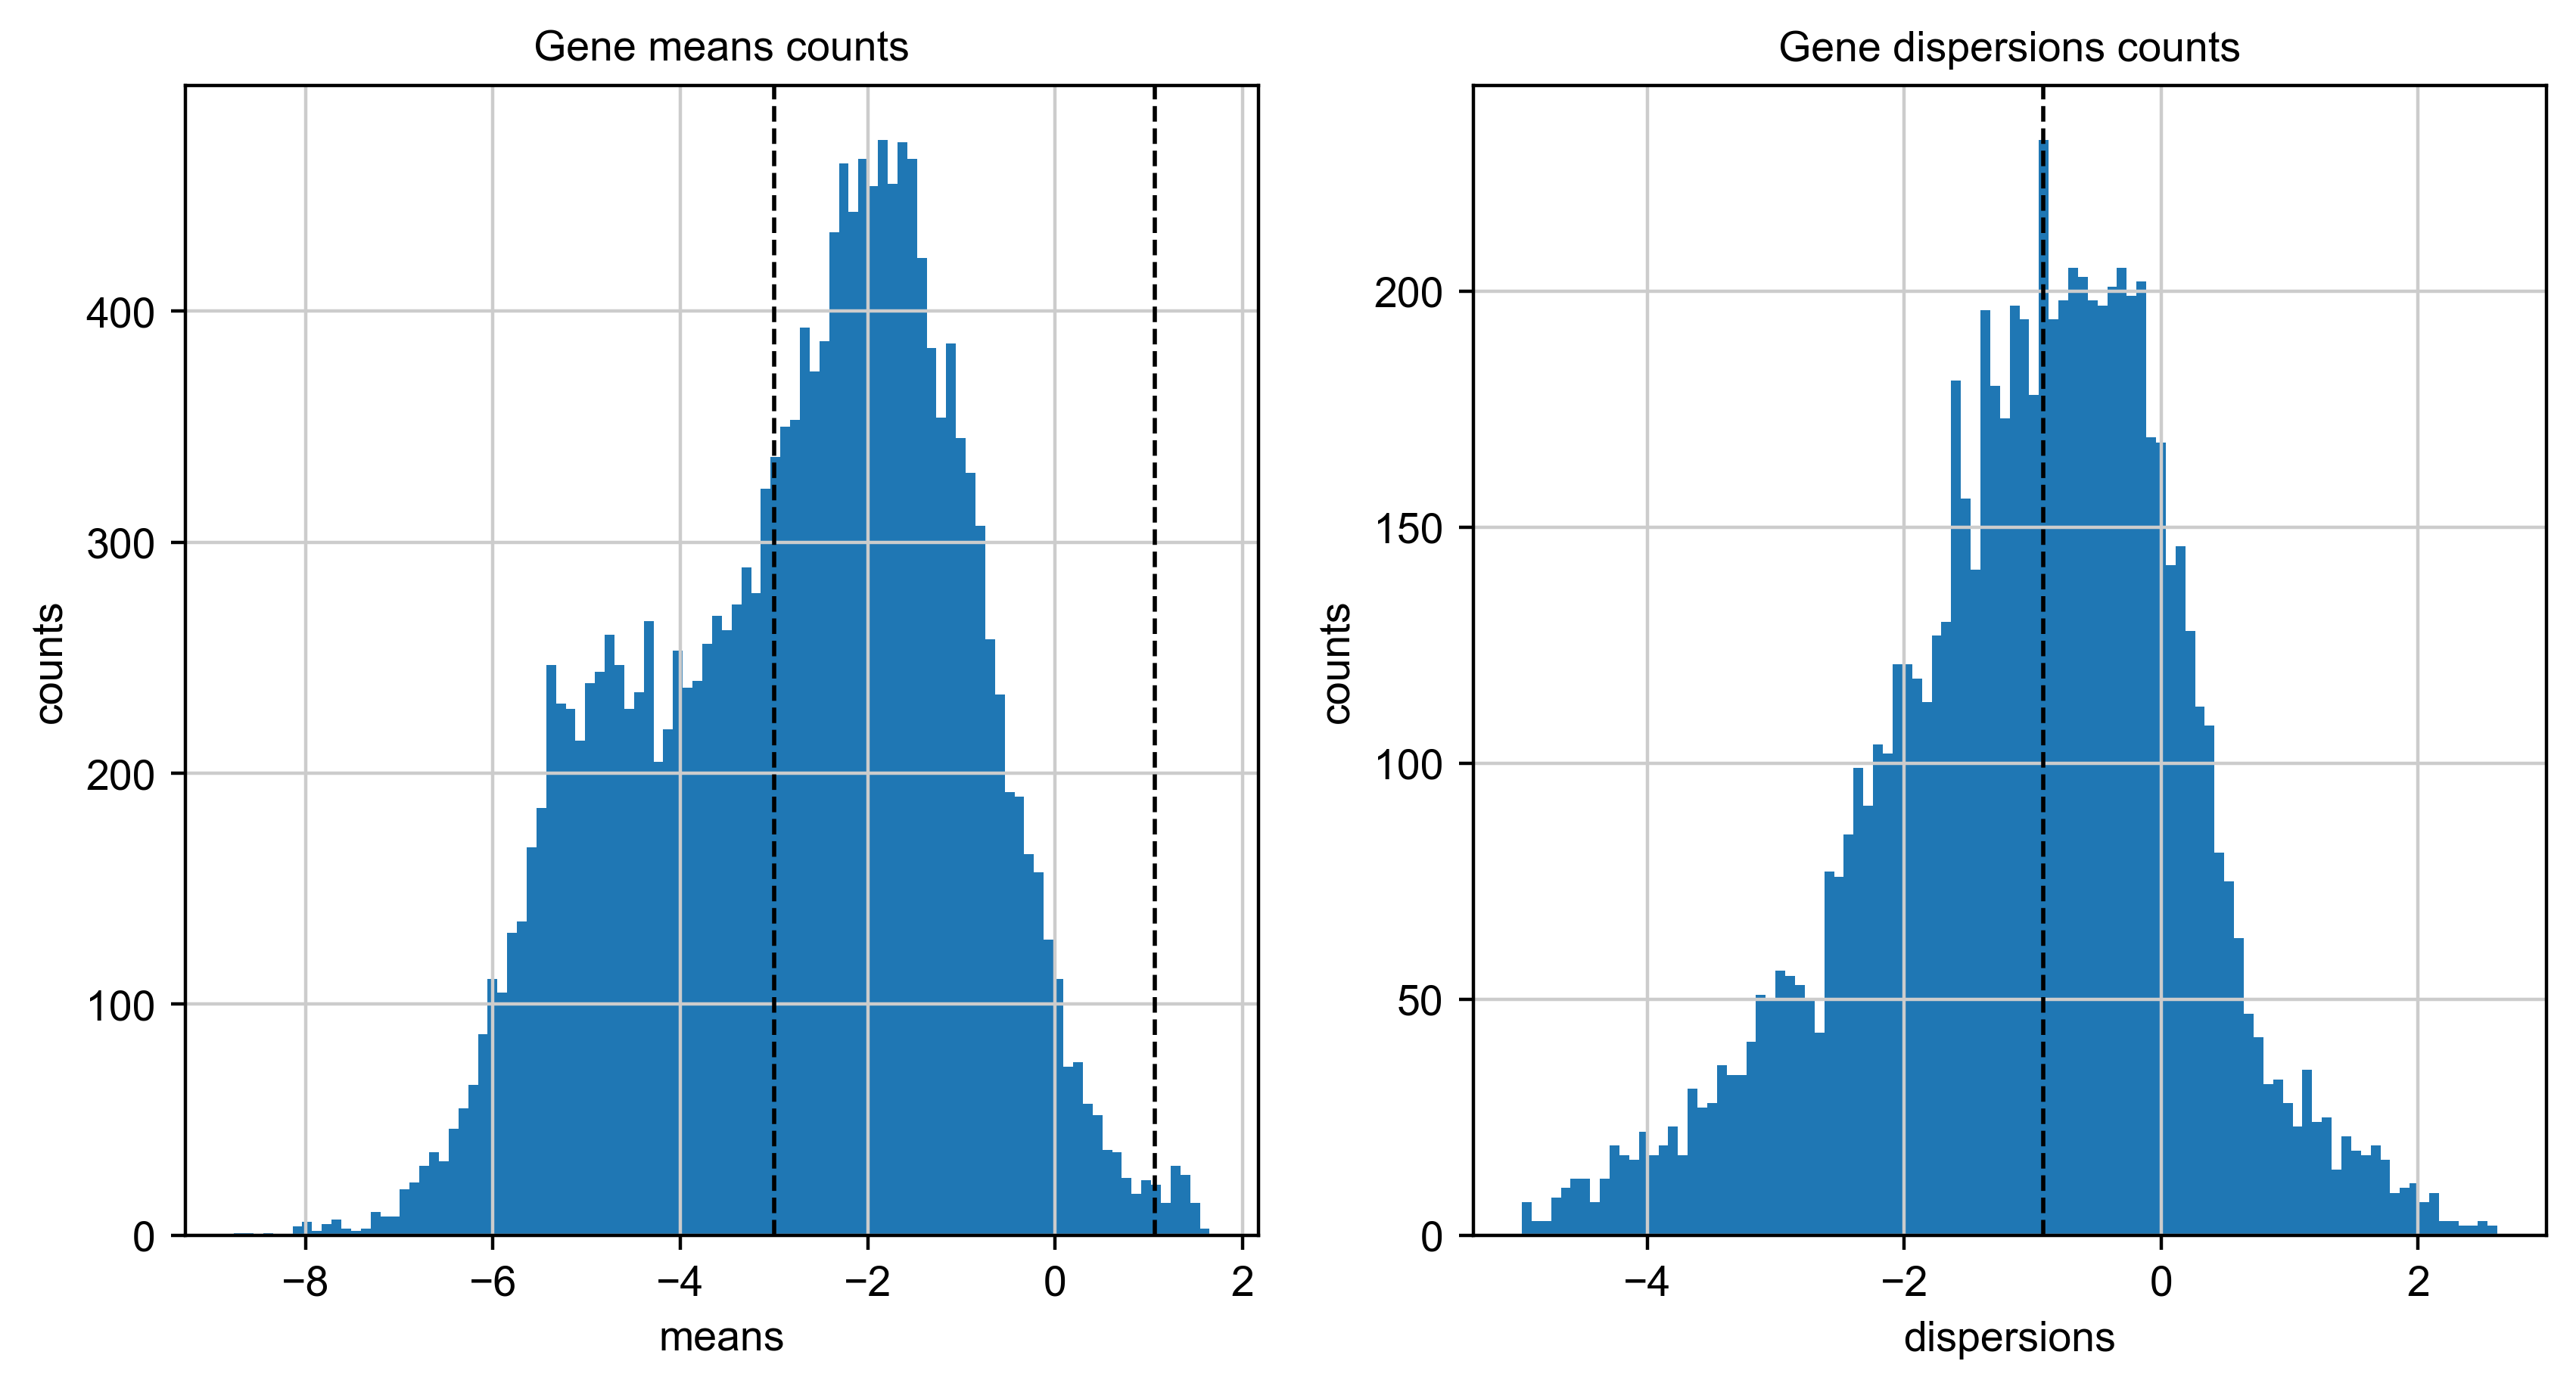

In [32]:
minMean = 0.05
maxMean = 2.9
minDisp = 0.4

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

means = adata.var[["means"]][adata.var[["means"]] > np.exp(-14)]#adata.var[["means"]],
axs[0].hist(np.log(means), bins=100)#, log=True),
axs[0].axvline(np.log(minMean), color='k', linestyle='dashed', linewidth=1)
axs[0].axvline(np.log(maxMean), color='k', linestyle='dashed', linewidth=1)
axs[0].set_title('Gene means counts')
axs[0].set_xlabel('means')
axs[0].set_ylabel('counts')

dispNorm = adata.var[["dispersions_norm"]][adata.var[["dispersions_norm"]] > np.exp(-5)]#adata.var[["means"]],
axs[1].hist(np.log(dispNorm), bins=100)#, log=True),
axs[1].axvline(np.log(minDisp), color='k', linestyle='dashed', linewidth=1)
axs[1].set_title('Gene dispersions counts')
axs[1].set_xlabel('dispersions')
axs[1].set_ylabel('counts')

sc.pp.highly_variable_genes(adata, min_disp=minDisp, min_mean=minMean, max_mean=maxMean)
print(sum(adata.var.highly_variable))

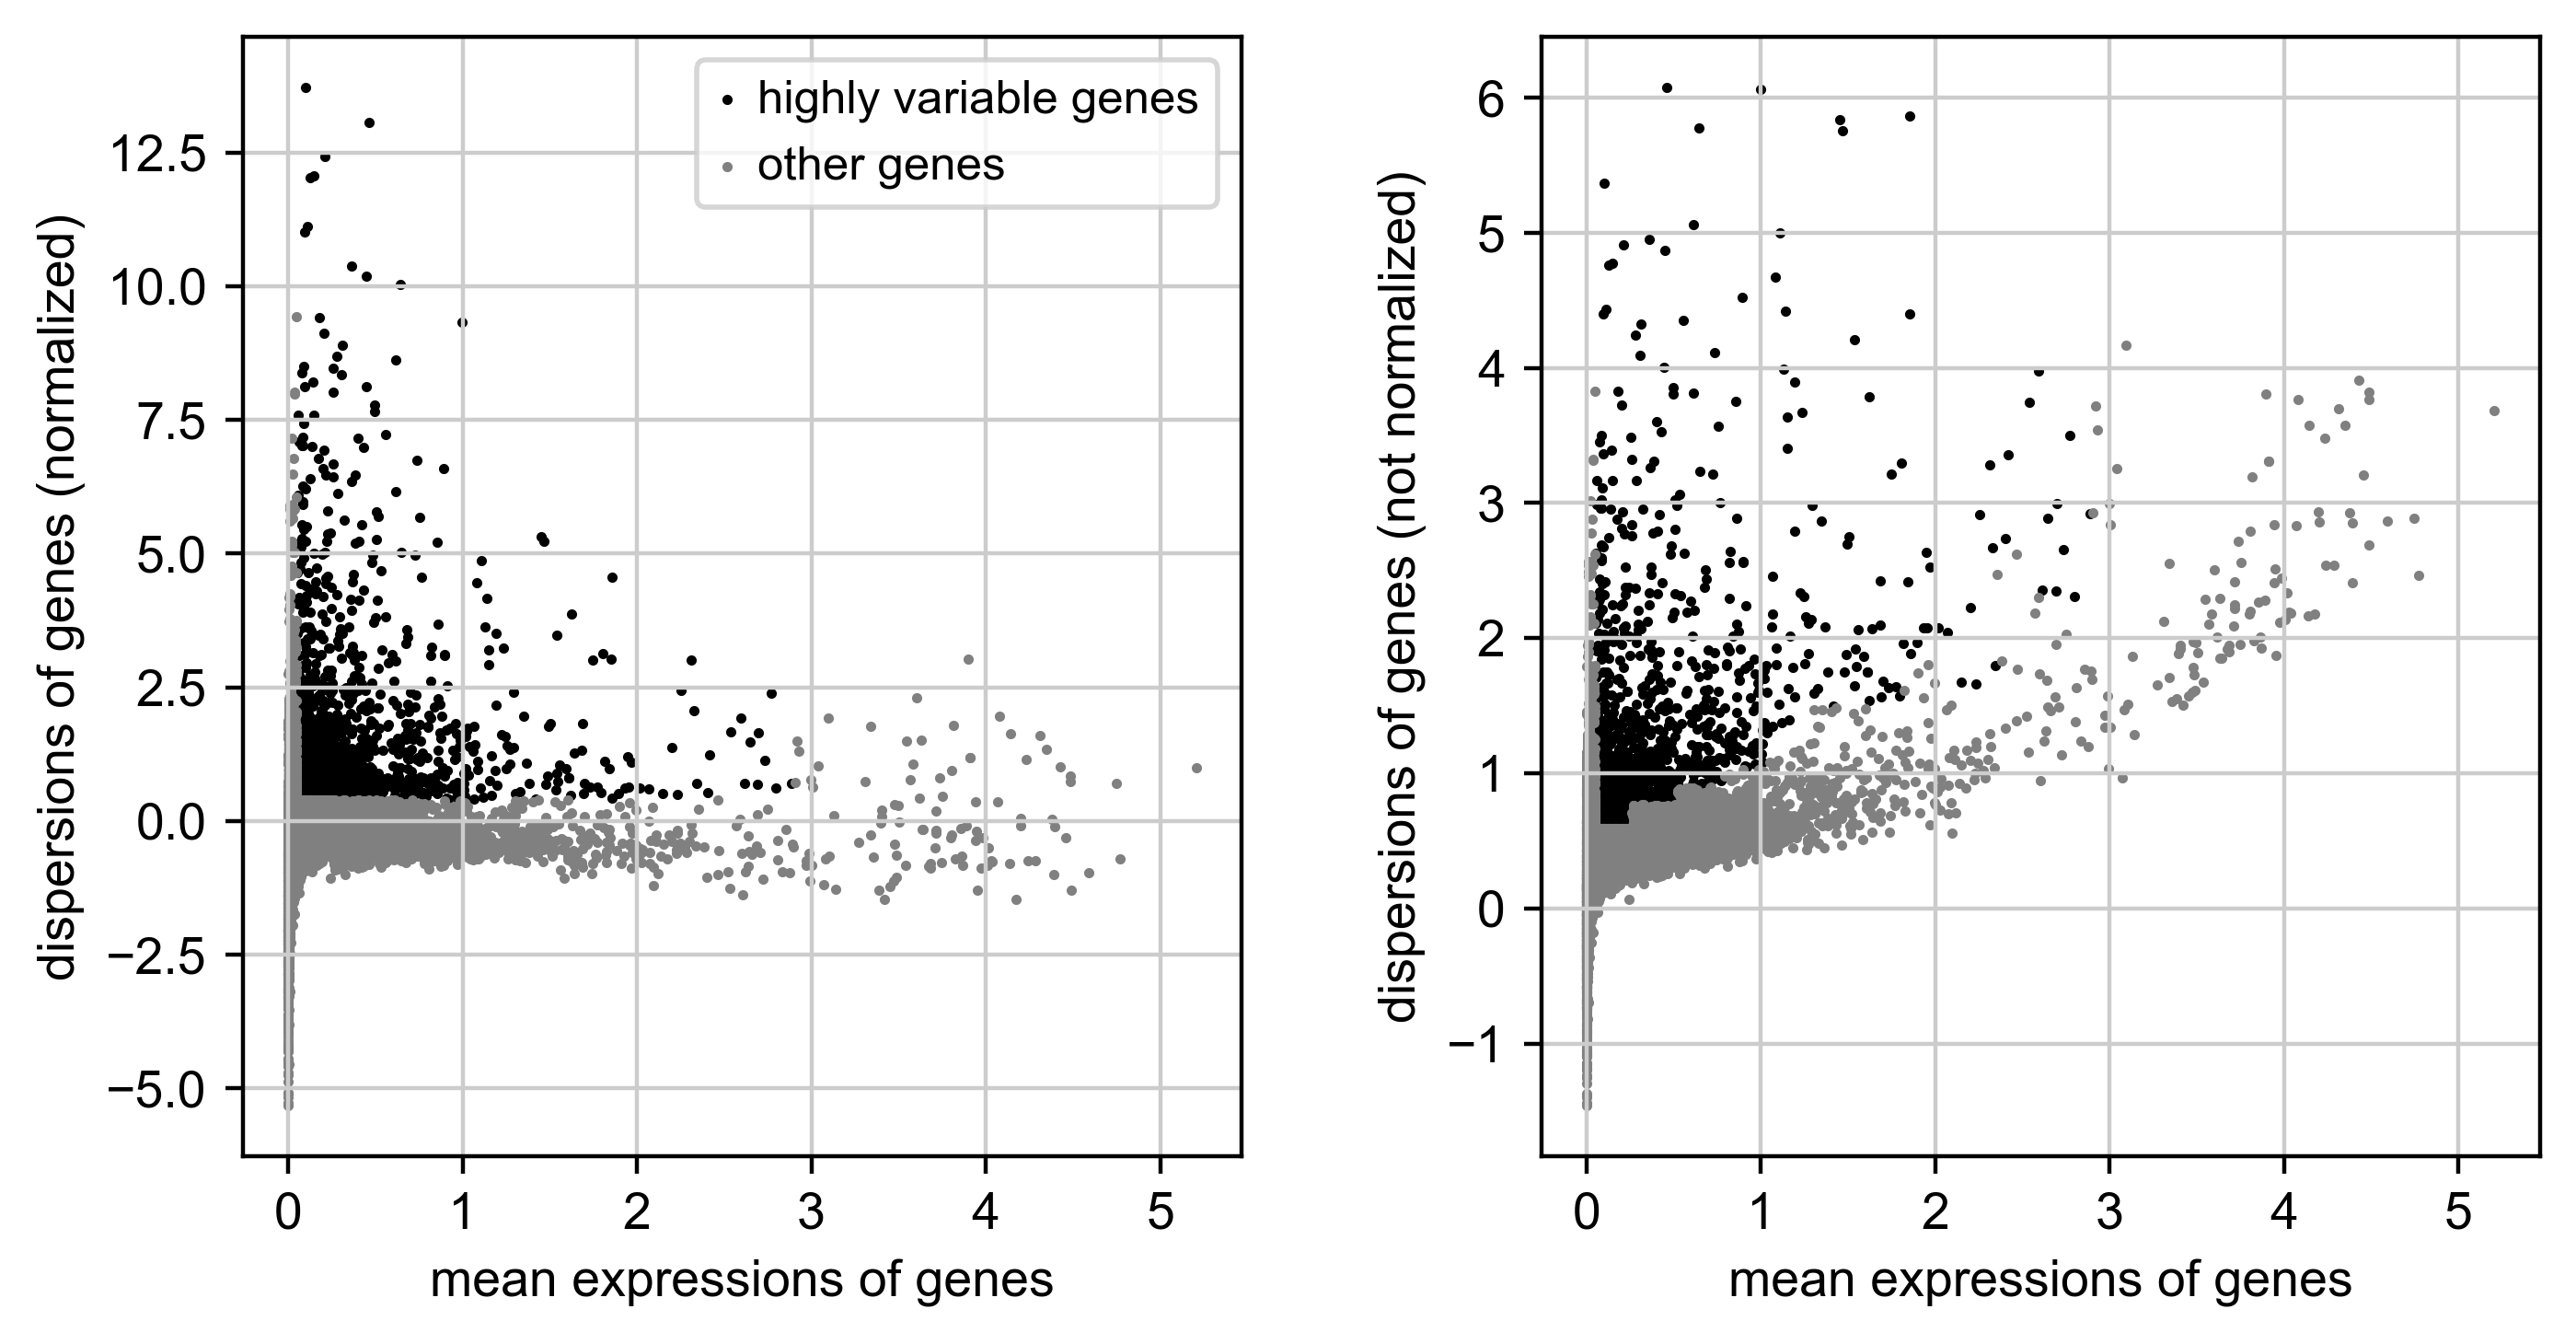

In [33]:
sc.pl.highly_variable_genes(adata)

In [34]:
#for inGene in adata.var[-8:].index.tolist():
#    adata.var.loc[inGene,"highly_variable"] = False

In [35]:
adata.raw = adata

In [36]:
#adata = adata[:, adata.var.highly_variable]
adata = adata[:, np.logical_and(adata.var.highly_variable, np.logical_not(adata.var.mt))]

In [37]:
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [38]:
#sc.pp.scale(adata, max_value=10)

In [39]:
sc.tl.pca(adata, n_comps = 100, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


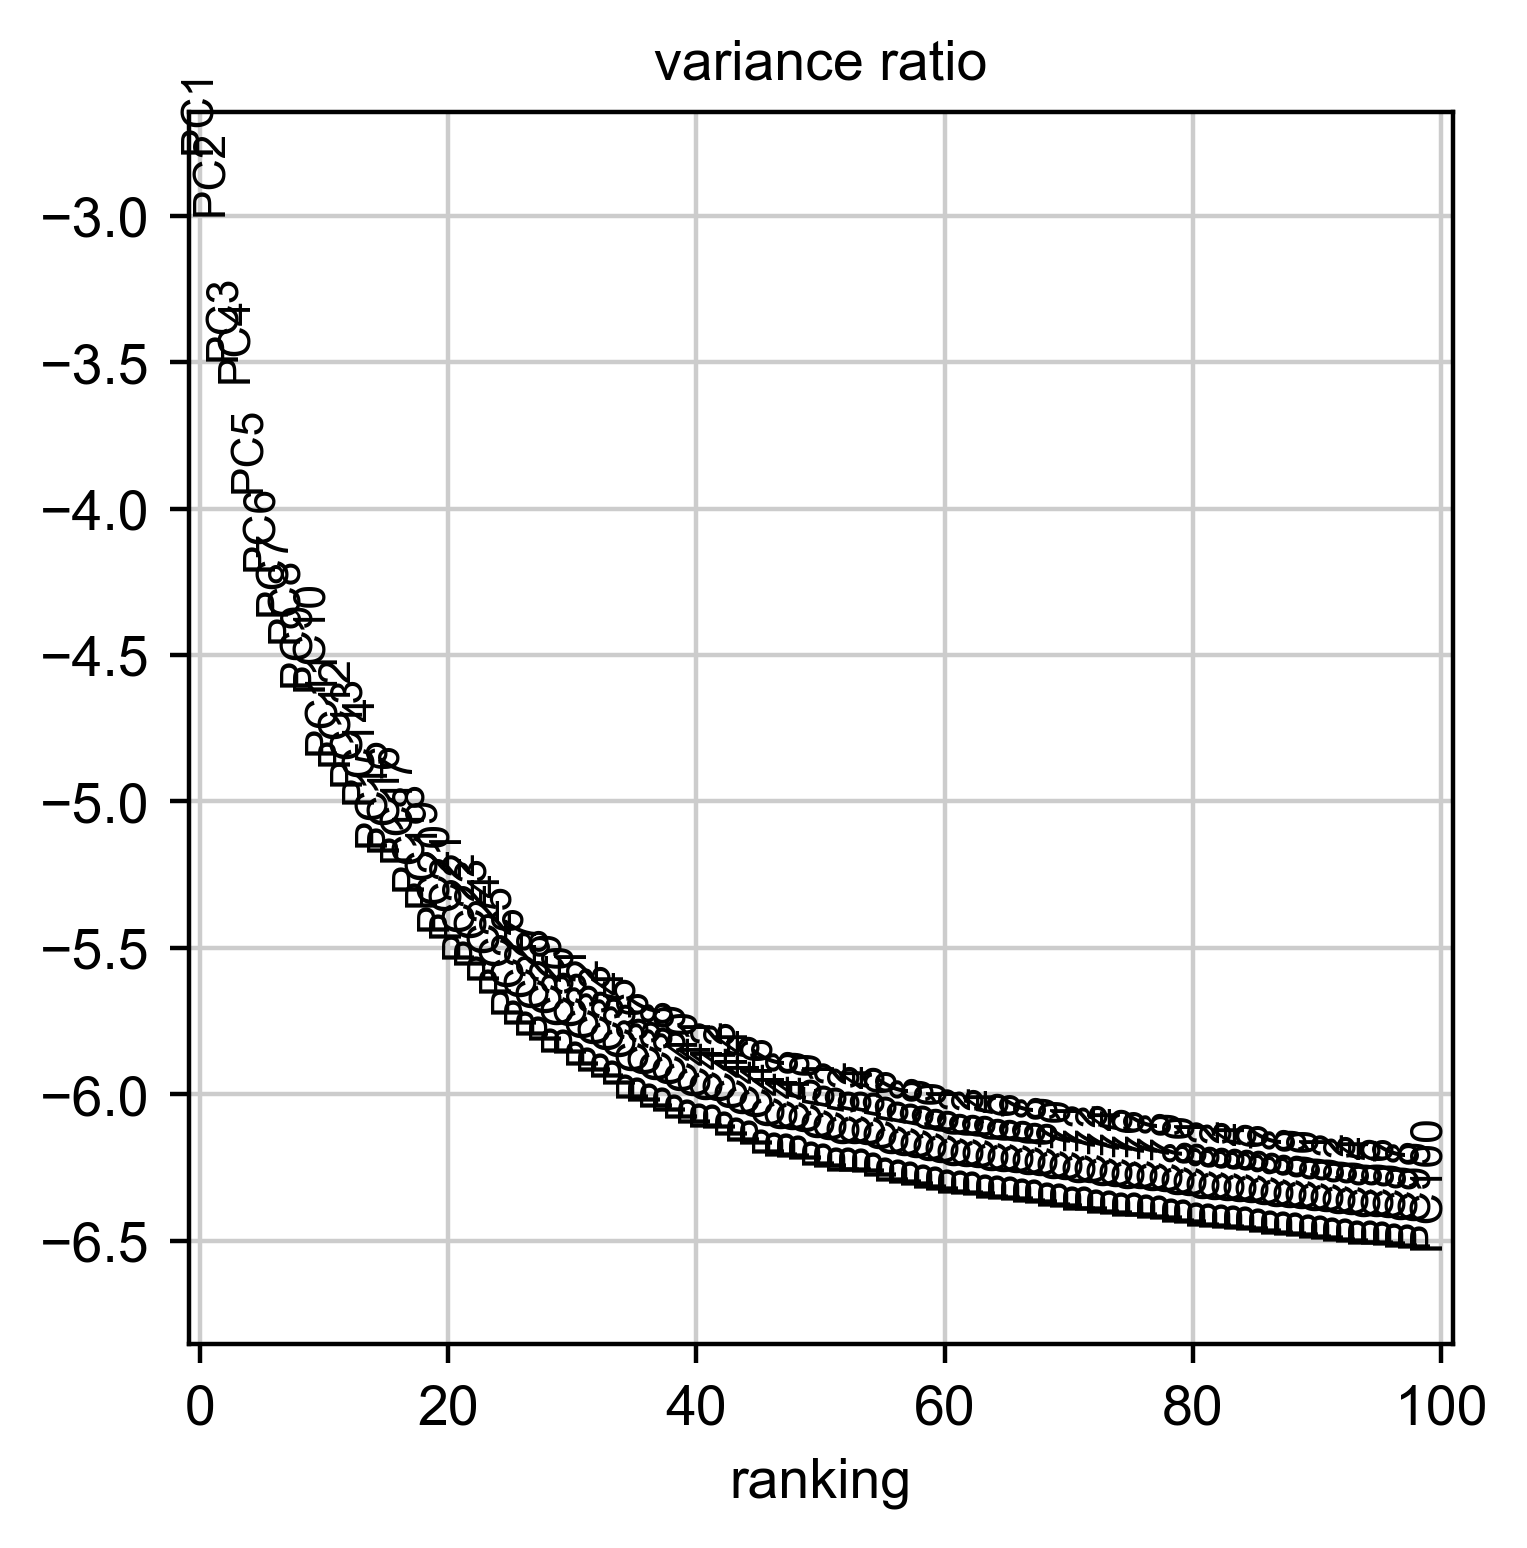

In [40]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100, log=True)

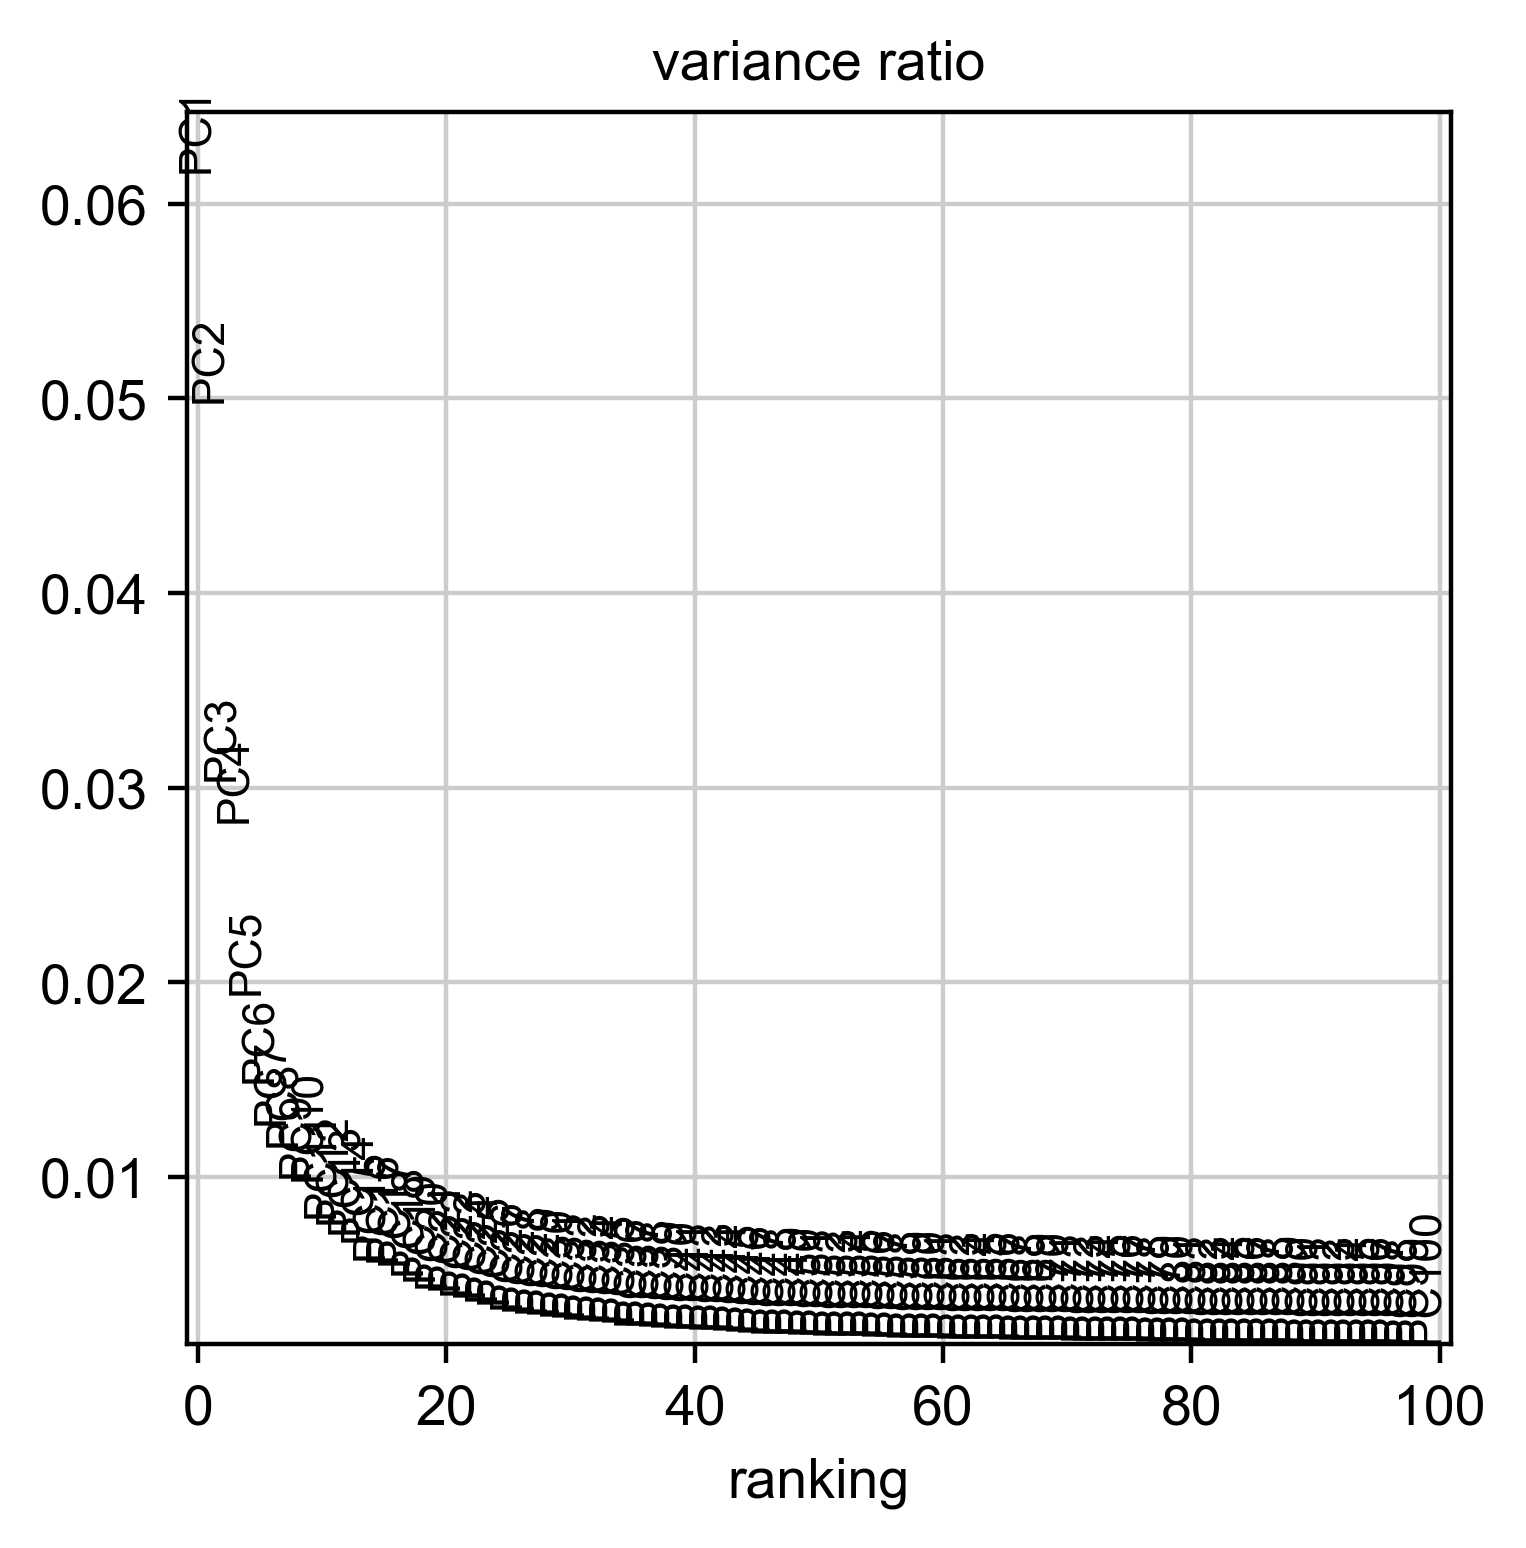

In [41]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100)

In [42]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [43]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


In [44]:
sc.tl.leiden(adata, resolution=0.1)

running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [45]:
adata.obs

sample  cell_type  complexity    umap1    umap2  \
cell_name                                                                
P01_AAACGGGAGACCTTTG-1    P01  Malignant        5440 -34.4062   2.3632   
P01_AAACGGGTCGGTTAAC-1    P01  Malignant        4842 -33.8564   2.2956   
P01_AAAGATGTCACATACG-1    P01  Malignant        5860 -33.5432   3.3170   
P01_AAAGATGTCCACGTGG-1    P01  Malignant        5987 -34.7744   2.4062   
P01_AAATGCCCAACACGCC-1    P01  Malignant        6157 -33.9224   3.2696   
...                       ...        ...         ...      ...      ...   
P15_ACCTTTAAGTGGCACA-1    P15  Malignant        1726 -11.4782 -27.1467   
P15_CACAGGCAGATGCCAG-1    P15  Malignant        1538 -11.3445 -27.8589   
P15_CTAGCCTTCCAAGCCG-1    P15  Malignant        1939 -11.0893 -27.3812   
P15_GGACAAGCAGACAAGC-1    P15  Malignant        1998 -11.1542 -27.6033   
P15_TGCACCTAGTAGCCGA-1    P15  Malignant        1421 -15.4829 -22.1739   

                        g1s_score  g2m_score cell_cycle_phase  mp_top_score  \
cell_name                                                                     
P01_AAACGGGAGACCTTTG-1     1.4396     1.2075     Intermediate        1.0872   
P01_AAACGGGTCGGTTAAC-1     2.0813     0.3016             G1/S        1.5709   
P01_AAAGATGTCACATACG-1     0.3769     0.0950      Not cycling        0.7443   
P01_AAAGATGTCCACGTGG-1     1.8027     1.2573     Intermediate        1.4229   
P01_AAATGCCCAACACGCC-1     0.0558     0.0358      Not cycling        0.8322   
...                           ...        ...              ...           ...   
P15_ACCTTTAAGTGGCACA-1    -0.2222    -0.2065      Not cycling           NaN   
P15_CACAGGCAGATGCCAG-1    -0.4188    -0.1466      Not cycling           NaN   
P15_CTAGCCTTCCAAGCCG-1    -0.1785    -0.0153      Not cycling           NaN   
P15_GGACAAGCAGACAAGC-1    -0.4350    -0.1407      Not cycling           NaN   
P15_TGCACCTAGTAGCCGA-1    -0.3625     1.1793             G2/M           NaN   

                                   mp_top  ... n_genes n_genes_by_counts  \
cell_name                                  ...                             
P01_AAACGGGAGACCTTTG-1  Cell Cycle - G2/M  ...    5441              5427   
P01_AAACGGGTCGGTTAAC-1  Cell Cycle - G1/S  ...    4844              4835   
P01_AAAGATGTCACATACG-1             Stress  ...    5861              5854   
P01_AAAGATGTCCACGTGG-1  Cell Cycle - G1/S  ...    5989              5980   
P01_AAATGCCCAACACGCC-1            Hypoxia  ...    6159              6149   
...                                   ...  ...     ...               ...   
P15_ACCTTTAAGTGGCACA-1                NaN  ...    1726              1711   
P15_CACAGGCAGATGCCAG-1                NaN  ...    1538              1525   
P15_CTAGCCTTCCAAGCCG-1                NaN  ...    1940              1919   
P15_GGACAAGCAGACAAGC-1                NaN  ...    1998              1983   
P15_TGCACCTAGTAGCCGA-1                NaN  ...    1421              1416   

                        total_counts  pct_counts_in_top_50_genes  \
cell_name                                                          
P01_AAACGGGAGACCTTTG-1       38896.0                   34.371144   
P01_AAACGGGTCGGTTAAC-1       28997.0                   34.865676   
P01_AAAGATGTCACATACG-1       40158.0                   28.843568   
P01_AAAGATGTCCACGTGG-1       47556.0                   31.518631   
P01_AAATGCCCAACACGCC-1       40833.0                   26.865525   
...                              ...                         ...   
P15_ACCTTTAAGTGGCACA-1        5672.0                   41.202398   
P15_CACAGGCAGATGCCAG-1        3317.0                   33.584564   
P15_CTAGCCTTCCAAGCCG-1        3781.0                   28.881248   
P15_GGACAAGCAGACAAGC-1        4174.0                   33.349305   
P15_TGCACCTAGTAGCCGA-1        3146.0                   30.197076   

                        pct_counts_in_top_100_genes  \
cell_name                                             
P01_AAACGGGAGACCTTTG-1                    48.552

In [52]:
meta[[ 'sex', 'age','smoking_status', 'disease_extent',
       'AJCC_T', 'AJCC_N', 'AJCC_M', 'AJCC_stage' ]]

sex  age smoking_status disease_extent AJCC_T AJCC_N AJCC_M AJCC_stage
sample                                                                       
P01      M   37            Yes  node positive     T3     N1     M0        III
P02      F   38             No  node positive     T2     N3     M0        IVA
P03      F   31             No  node positive     T1     N2     M0        III
P04      M   58            Yes     metastatic     T4     N3     M1        IVB
P05      M   74             No          local     T3     N0     M0        III
P06      F   36             No          local     T2     N2     M0        III
P07      M   45             No  node positive     T3     N1     M0        III
P08      M   61            Yes  node positive     T2     N1     M0         II
P09      M   51             No  node positive     T2     N3     M0        IVA
P10      M   57            Yes  node positive     T4     N1     M0        IVA
P11      M   44            Yes  node positive     T1     N1     M0         II
P12      M   32             No  node positive     T4     N2     M0        IVA
P14      F   54             No     metastatic     T4     N2     M1        IVB
P15      M   32             No          local     T2     N0     M0         II

In [48]:
meta.columns

Index(['technology', 'n_cells', 'patient', 'cancer_type', 'sex', 'age',
       'smoking_status', 'PY', 'diagnosis_recurrence', 'disease_extent',
       'AJCC_T', 'AJCC_N', 'AJCC_M', 'AJCC_stage', 'sample_primary_met',
       'size', 'site', 'histology', 'genetic_hormonal_features', 'grade',
       'KI67', 'treated_naive', 'chemotherapy_exposed',
       'chemotherapy_response', 'targeted_rx_exposed', 'targeted_rx_response',
       'ICB_exposed', 'ICB_response', 'ET_exposed', 'ET_response',
       'time_end_of_rx_to_sampling', 'post_sampling_rx_exposed',
       'post_sampling_rx_response', 'PFS_DFS', 'OS'],
      dtype='object')

In [47]:
adata.obs["patient"] = pd.Categorical([str(s) for s in adata.obs["sample"]])

In [53]:
adata.obs["diagnosis"] = pd.Categorical([meta.loc[s].diagnosis_recurrence for s in adata.obs["sample"]])
adata.obs["cancerType"] = pd.Categorical([meta.loc[s].cancer_type for s in adata.obs["sample"]])
adata.obs["sex"] = pd.Categorical([meta.loc[s].sex for s in adata.obs["sample"]])
adata.obs["site"] = pd.Categorical([meta.loc[s].smoking_status for s in adata.obs["sample"]])

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

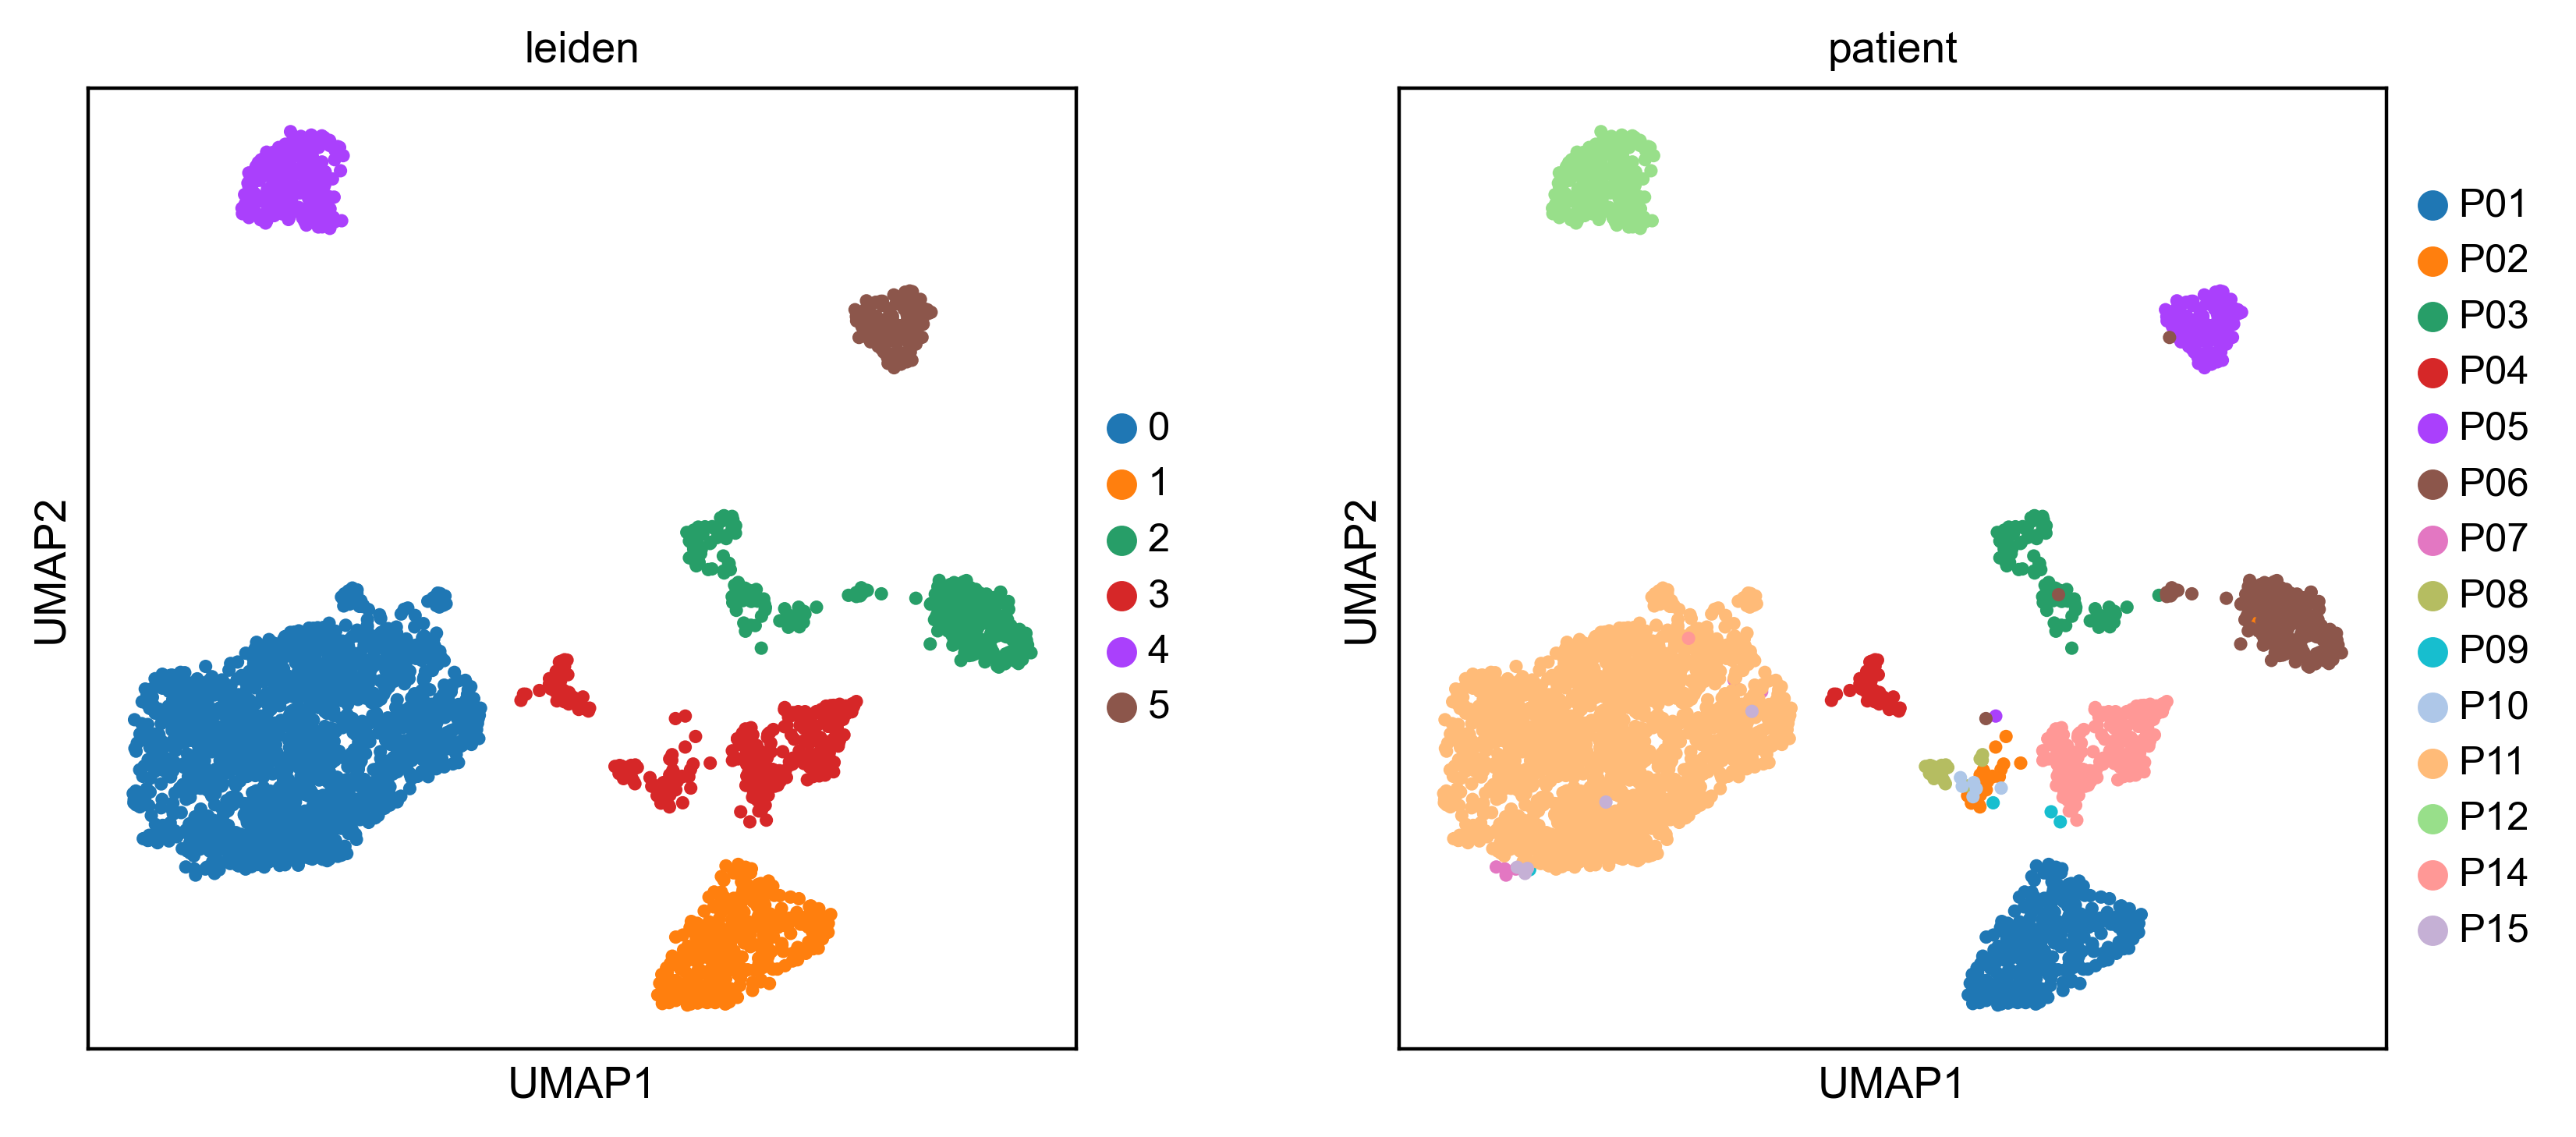

In [54]:
sc.pl.umap(adata, color=["leiden","patient"],ncols=4)

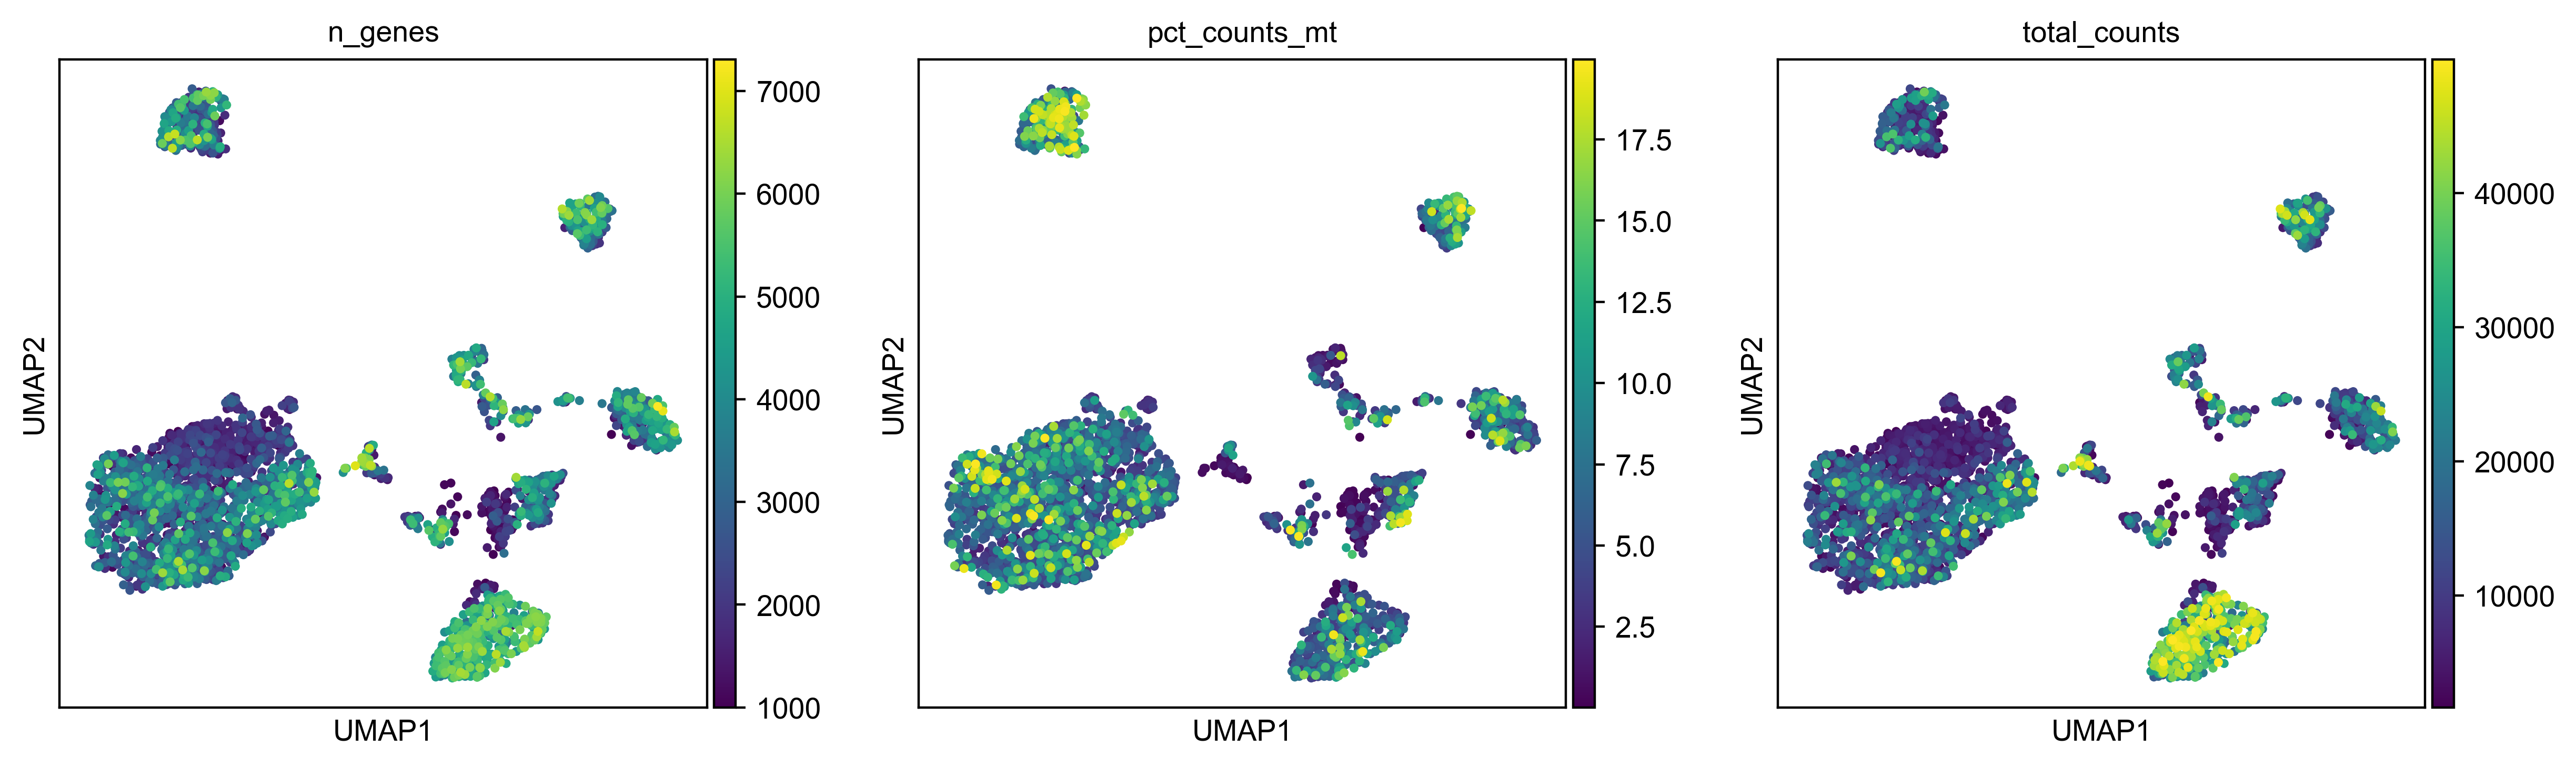

In [55]:
sc.pl.umap(adata, color=["n_genes","pct_counts_mt","total_counts"])

ranking genes


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


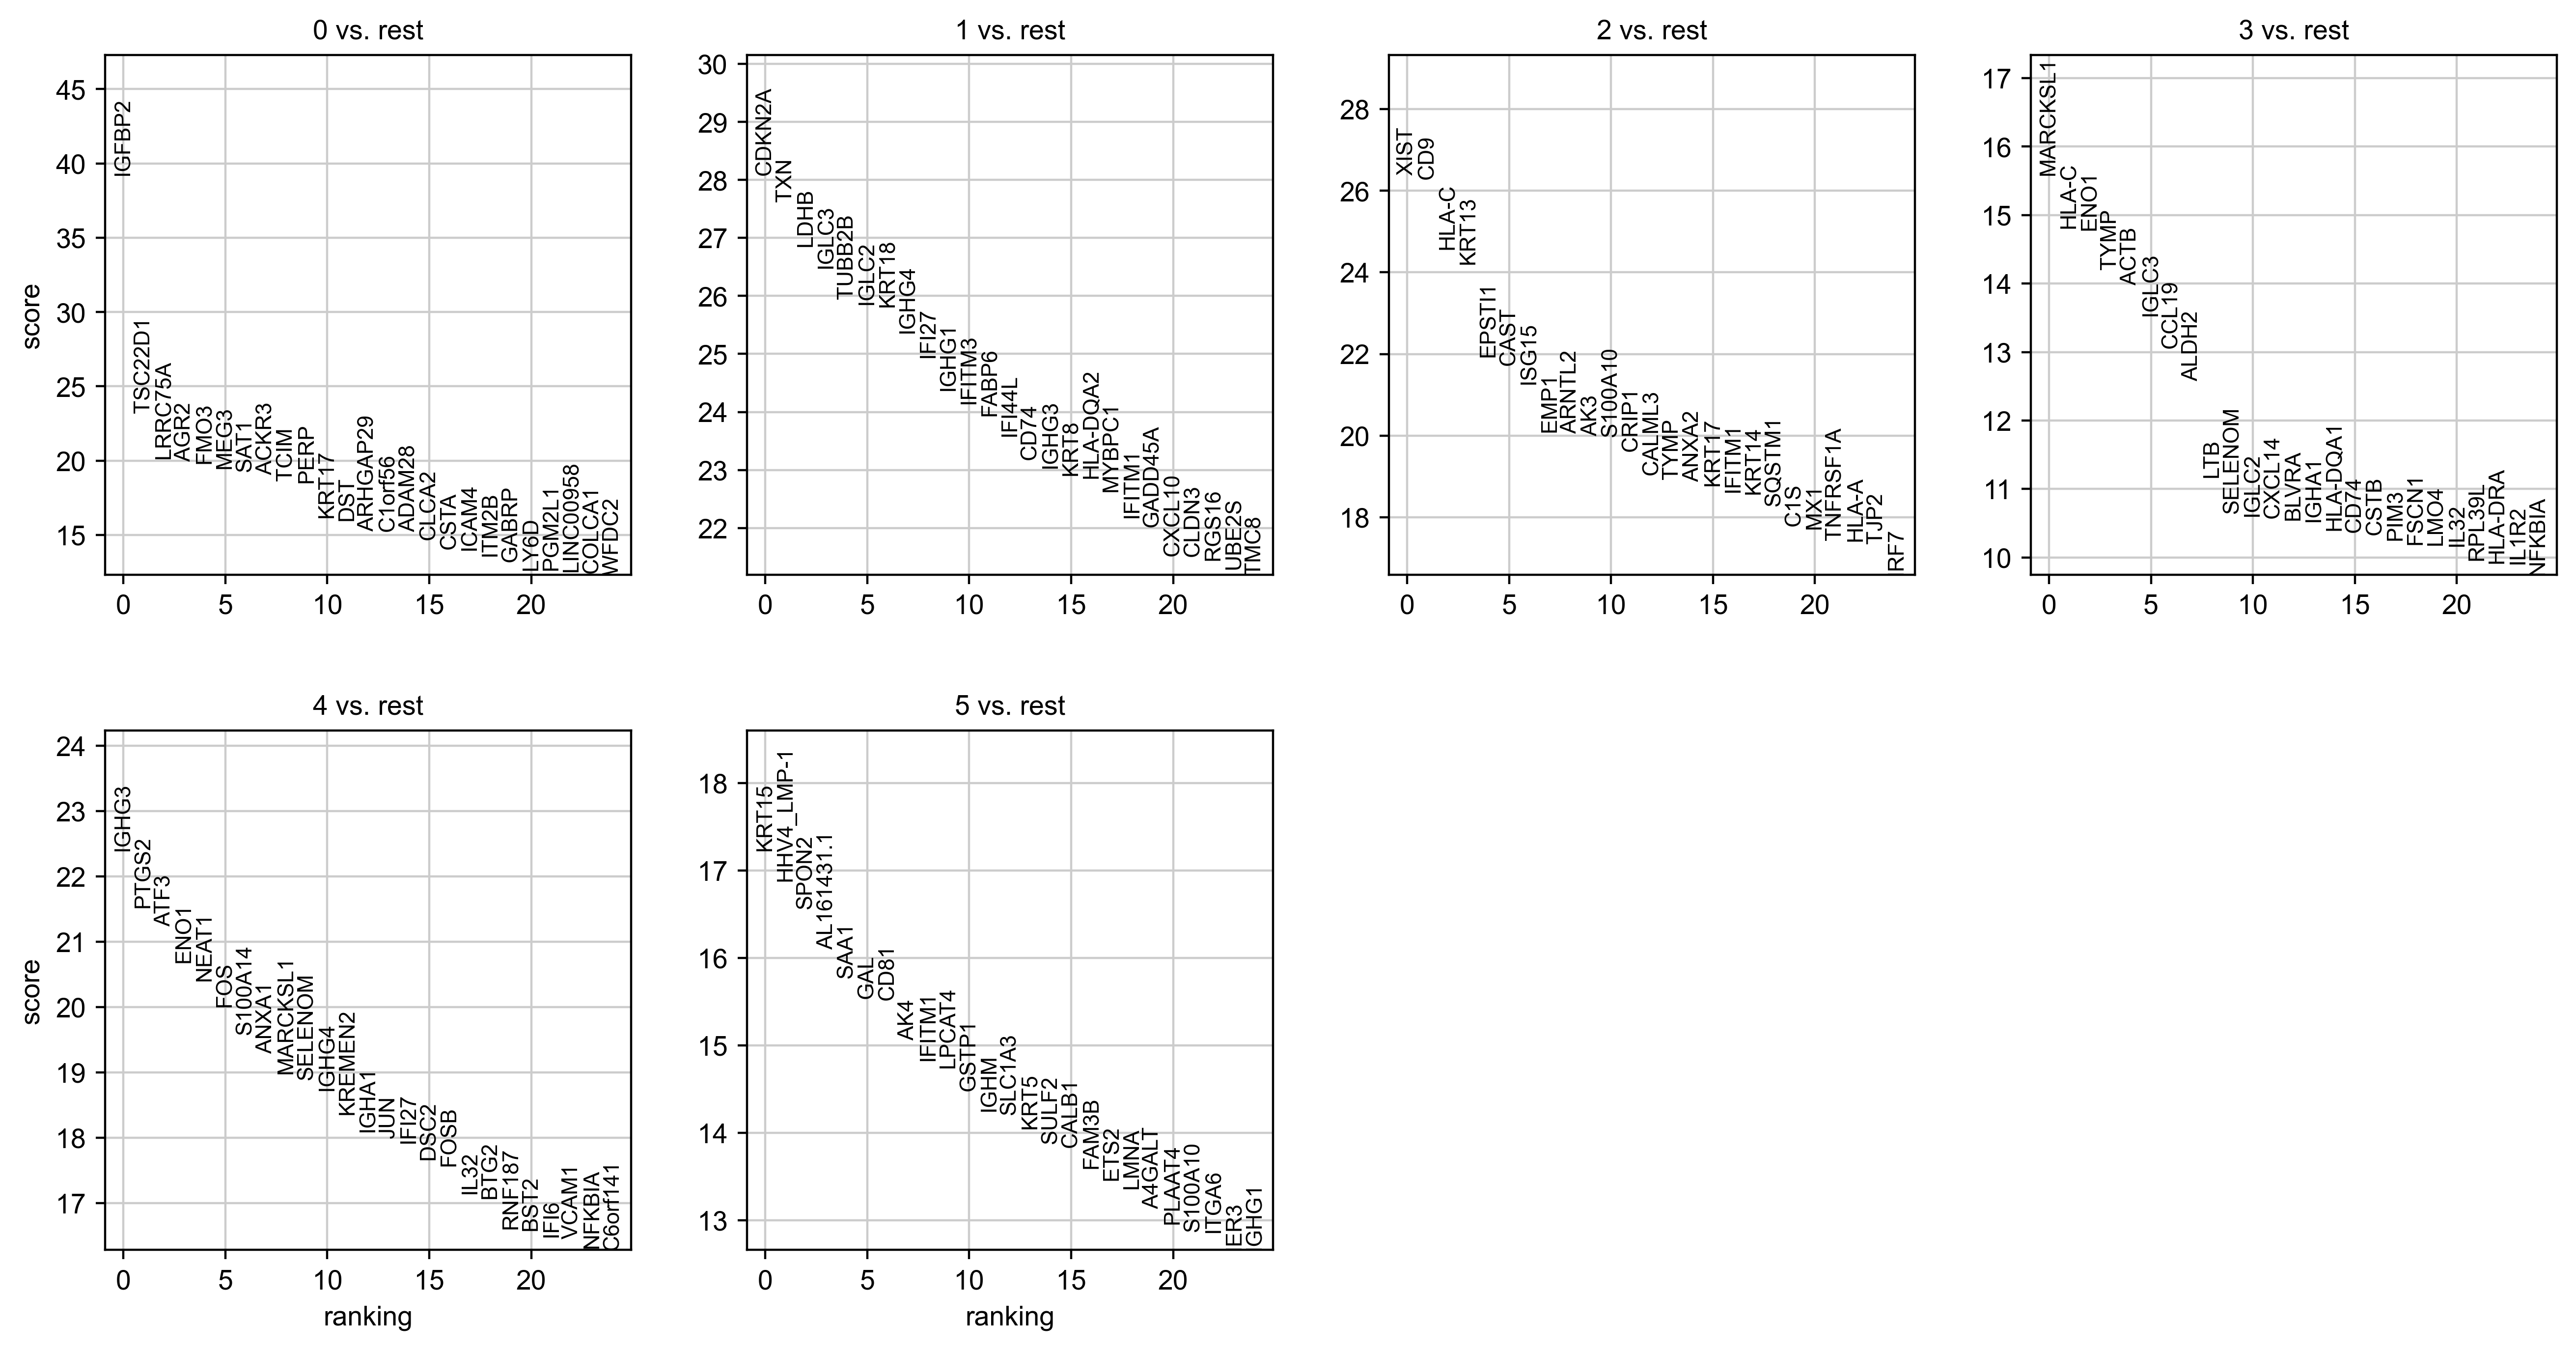

In [56]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw=False)
#sc.tl.filter_rank_genes_groups(adata, groupby="leiden", use_raw=False,
#                                   key_added='rank_genes_groups_filtered', 
#                                   min_in_group_fraction=0.25, min_fold_change=1, max_out_group_fraction=0.5, compare_abs=False)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [57]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(15)

0       1        2         3         4           5
0     IGFBP2  CDKN2A     XIST  MARCKSL1     IGHG3       KRT15
1    TSC22D1     TXN      CD9     HLA-C     PTGS2  HHV4_LMP-1
2    LRRC75A    LDHB    HLA-C      ENO1      ATF3       SPON2
3       AGR2   IGLC3    KRT13      TYMP      ENO1  AL161431.1
4       FMO3  TUBB2B   EPSTI1      ACTB     NEAT1        SAA1
5       MEG3   IGLC2     CAST     IGLC3       FOS         GAL
6       SAT1   KRT18    ISG15     CCL19   S100A14        CD81
7      ACKR3   IGHG4     EMP1     ALDH2     ANXA1         AK4
8       TCIM   IFI27   ARNTL2       LTB  MARCKSL1      IFITM1
9       PERP   IGHG1      AK3   SELENOM   SELENOM      LPCAT4
10     KRT17  IFITM3  S100A10     IGLC2     IGHG4       GSTP1
11       DST   FABP6    CRIP1    CXCL14   KREMEN2        IGHM
12  ARHGAP29  IFI44L   CALML3     BLVRA     IGHA1      SLC1A3
13   C1orf56    CD74     TYMP     IGHA1       JUN        KRT5
14    ADAM28   IGHG3    ANXA2  HLA-DQA1     IFI27       SULF2

    using 'X_pca' with n_pcs = 40
Storing dendrogram info using `.uns['dendrogram_leiden']`


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What

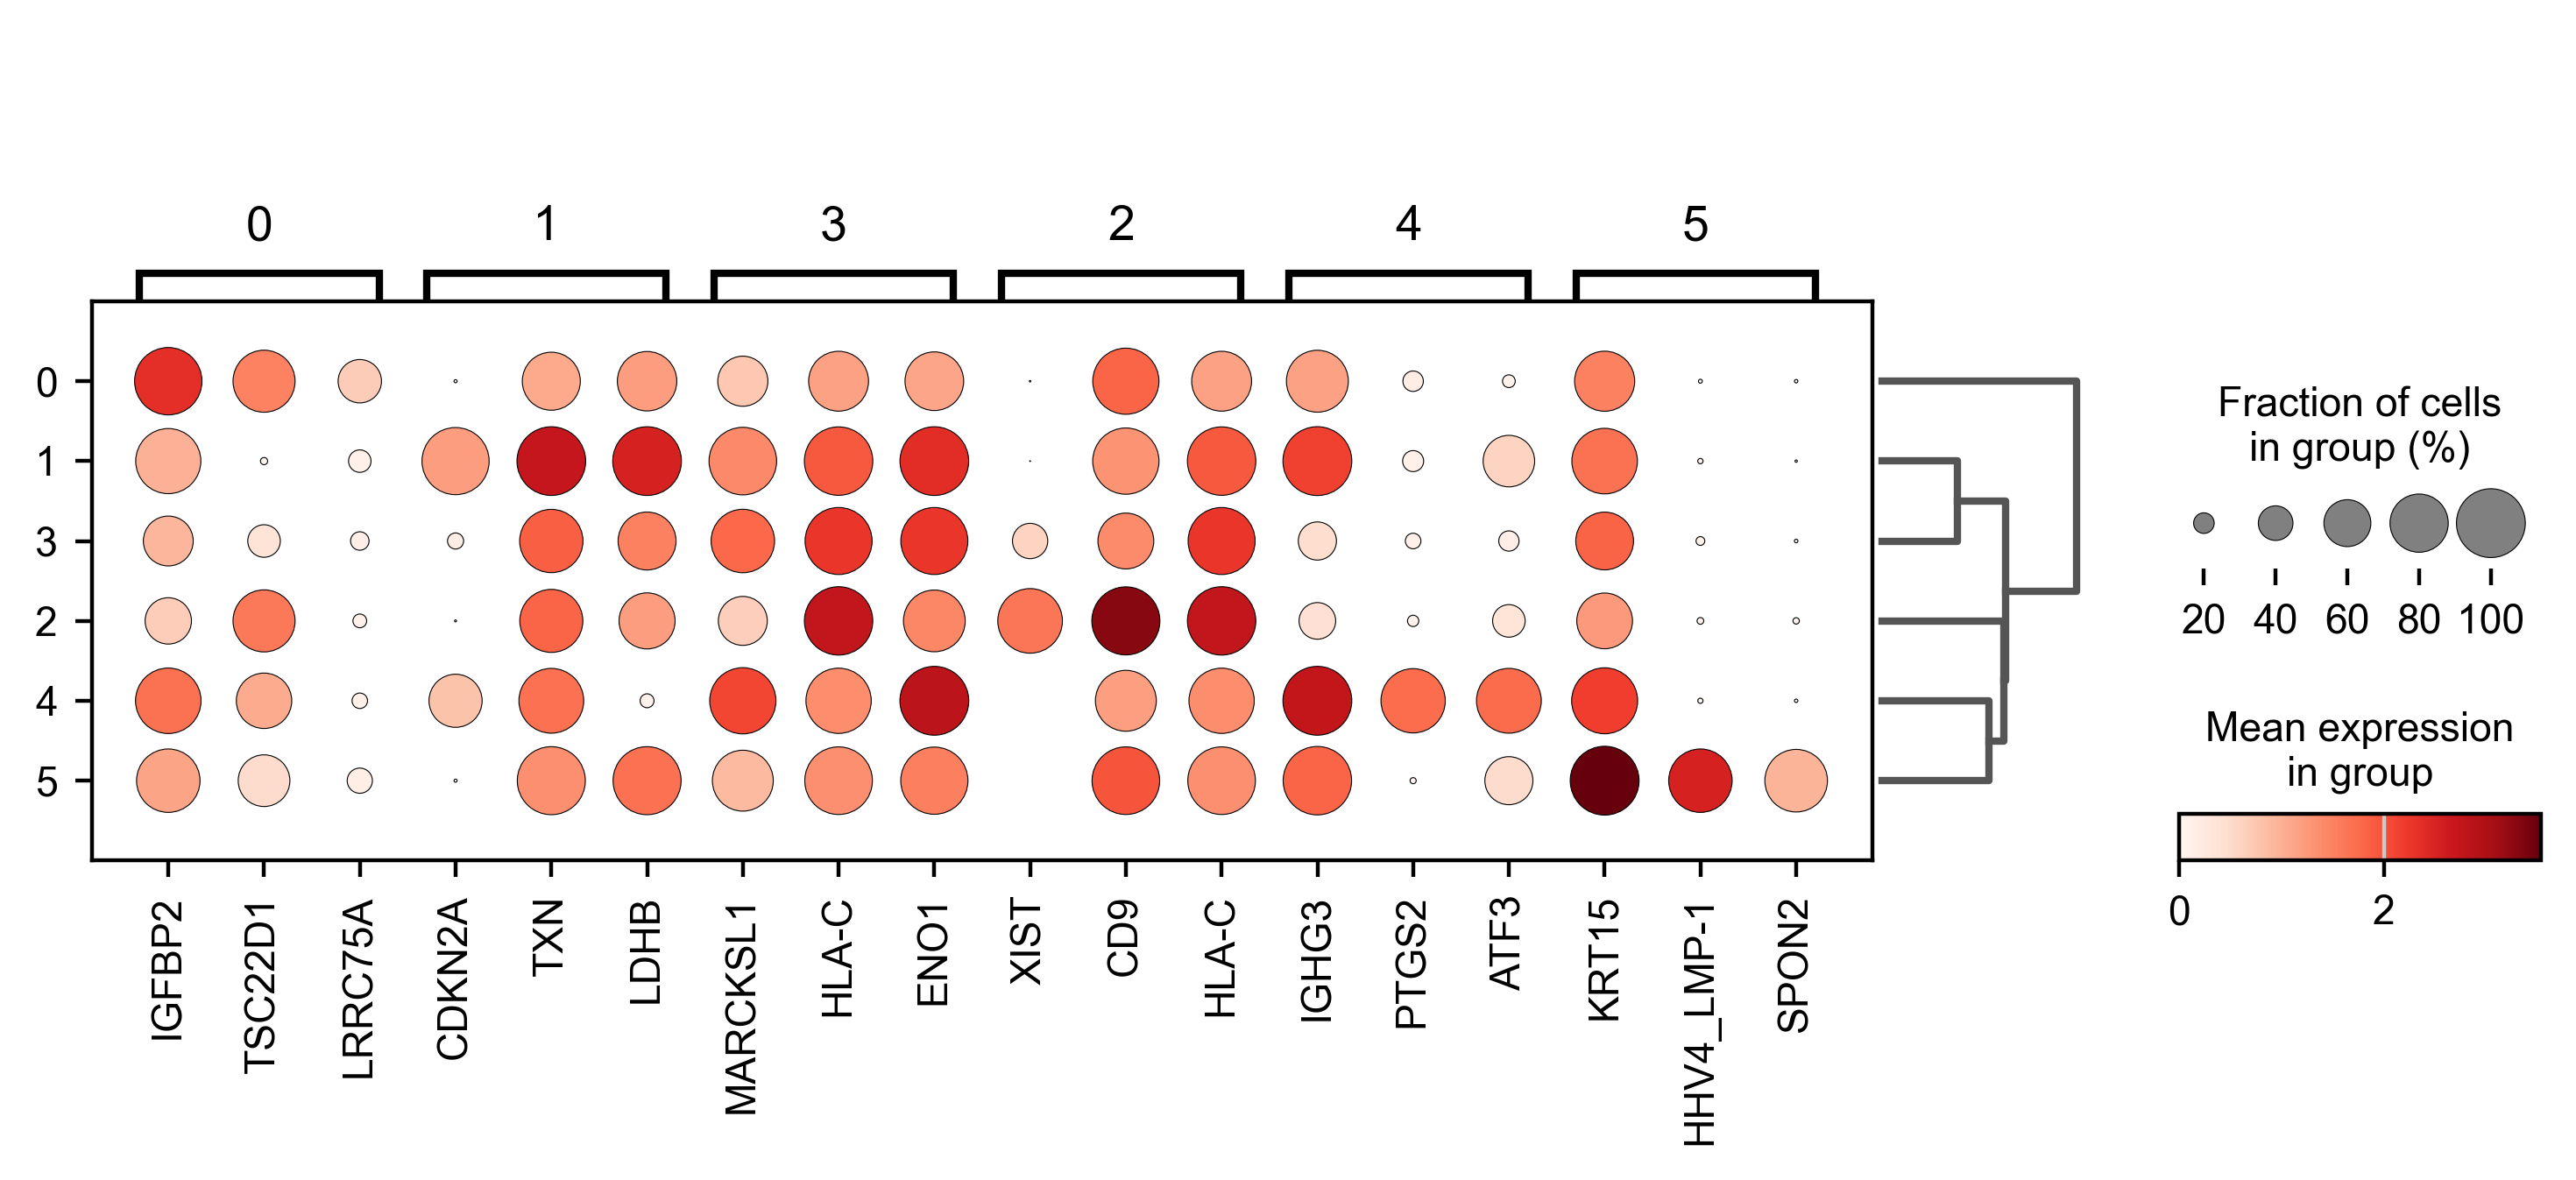

In [58]:
sc.tl.dendrogram(adata,groupby="leiden", n_pcs=40)
sc.pl.rank_genes_groups_dotplot(adata,n_genes=3)#,key="rank_genes_groups_filtered")

In [61]:
sigFile = "../mhCompTiss/data/LUAD/humanLUADgeneSig.csv"
sigGenes = pd.read_csv(sigFile)
hpcs = sigGenes["hpcs"]

In [62]:
sc.tl.score_genes(adata, hpcs, score_name="HPCS_score")

computing score 'HPCS_score'
    finished: added
    'HPCS_score', score of gene set (adata.obs).
    1041 total control genes are used. (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

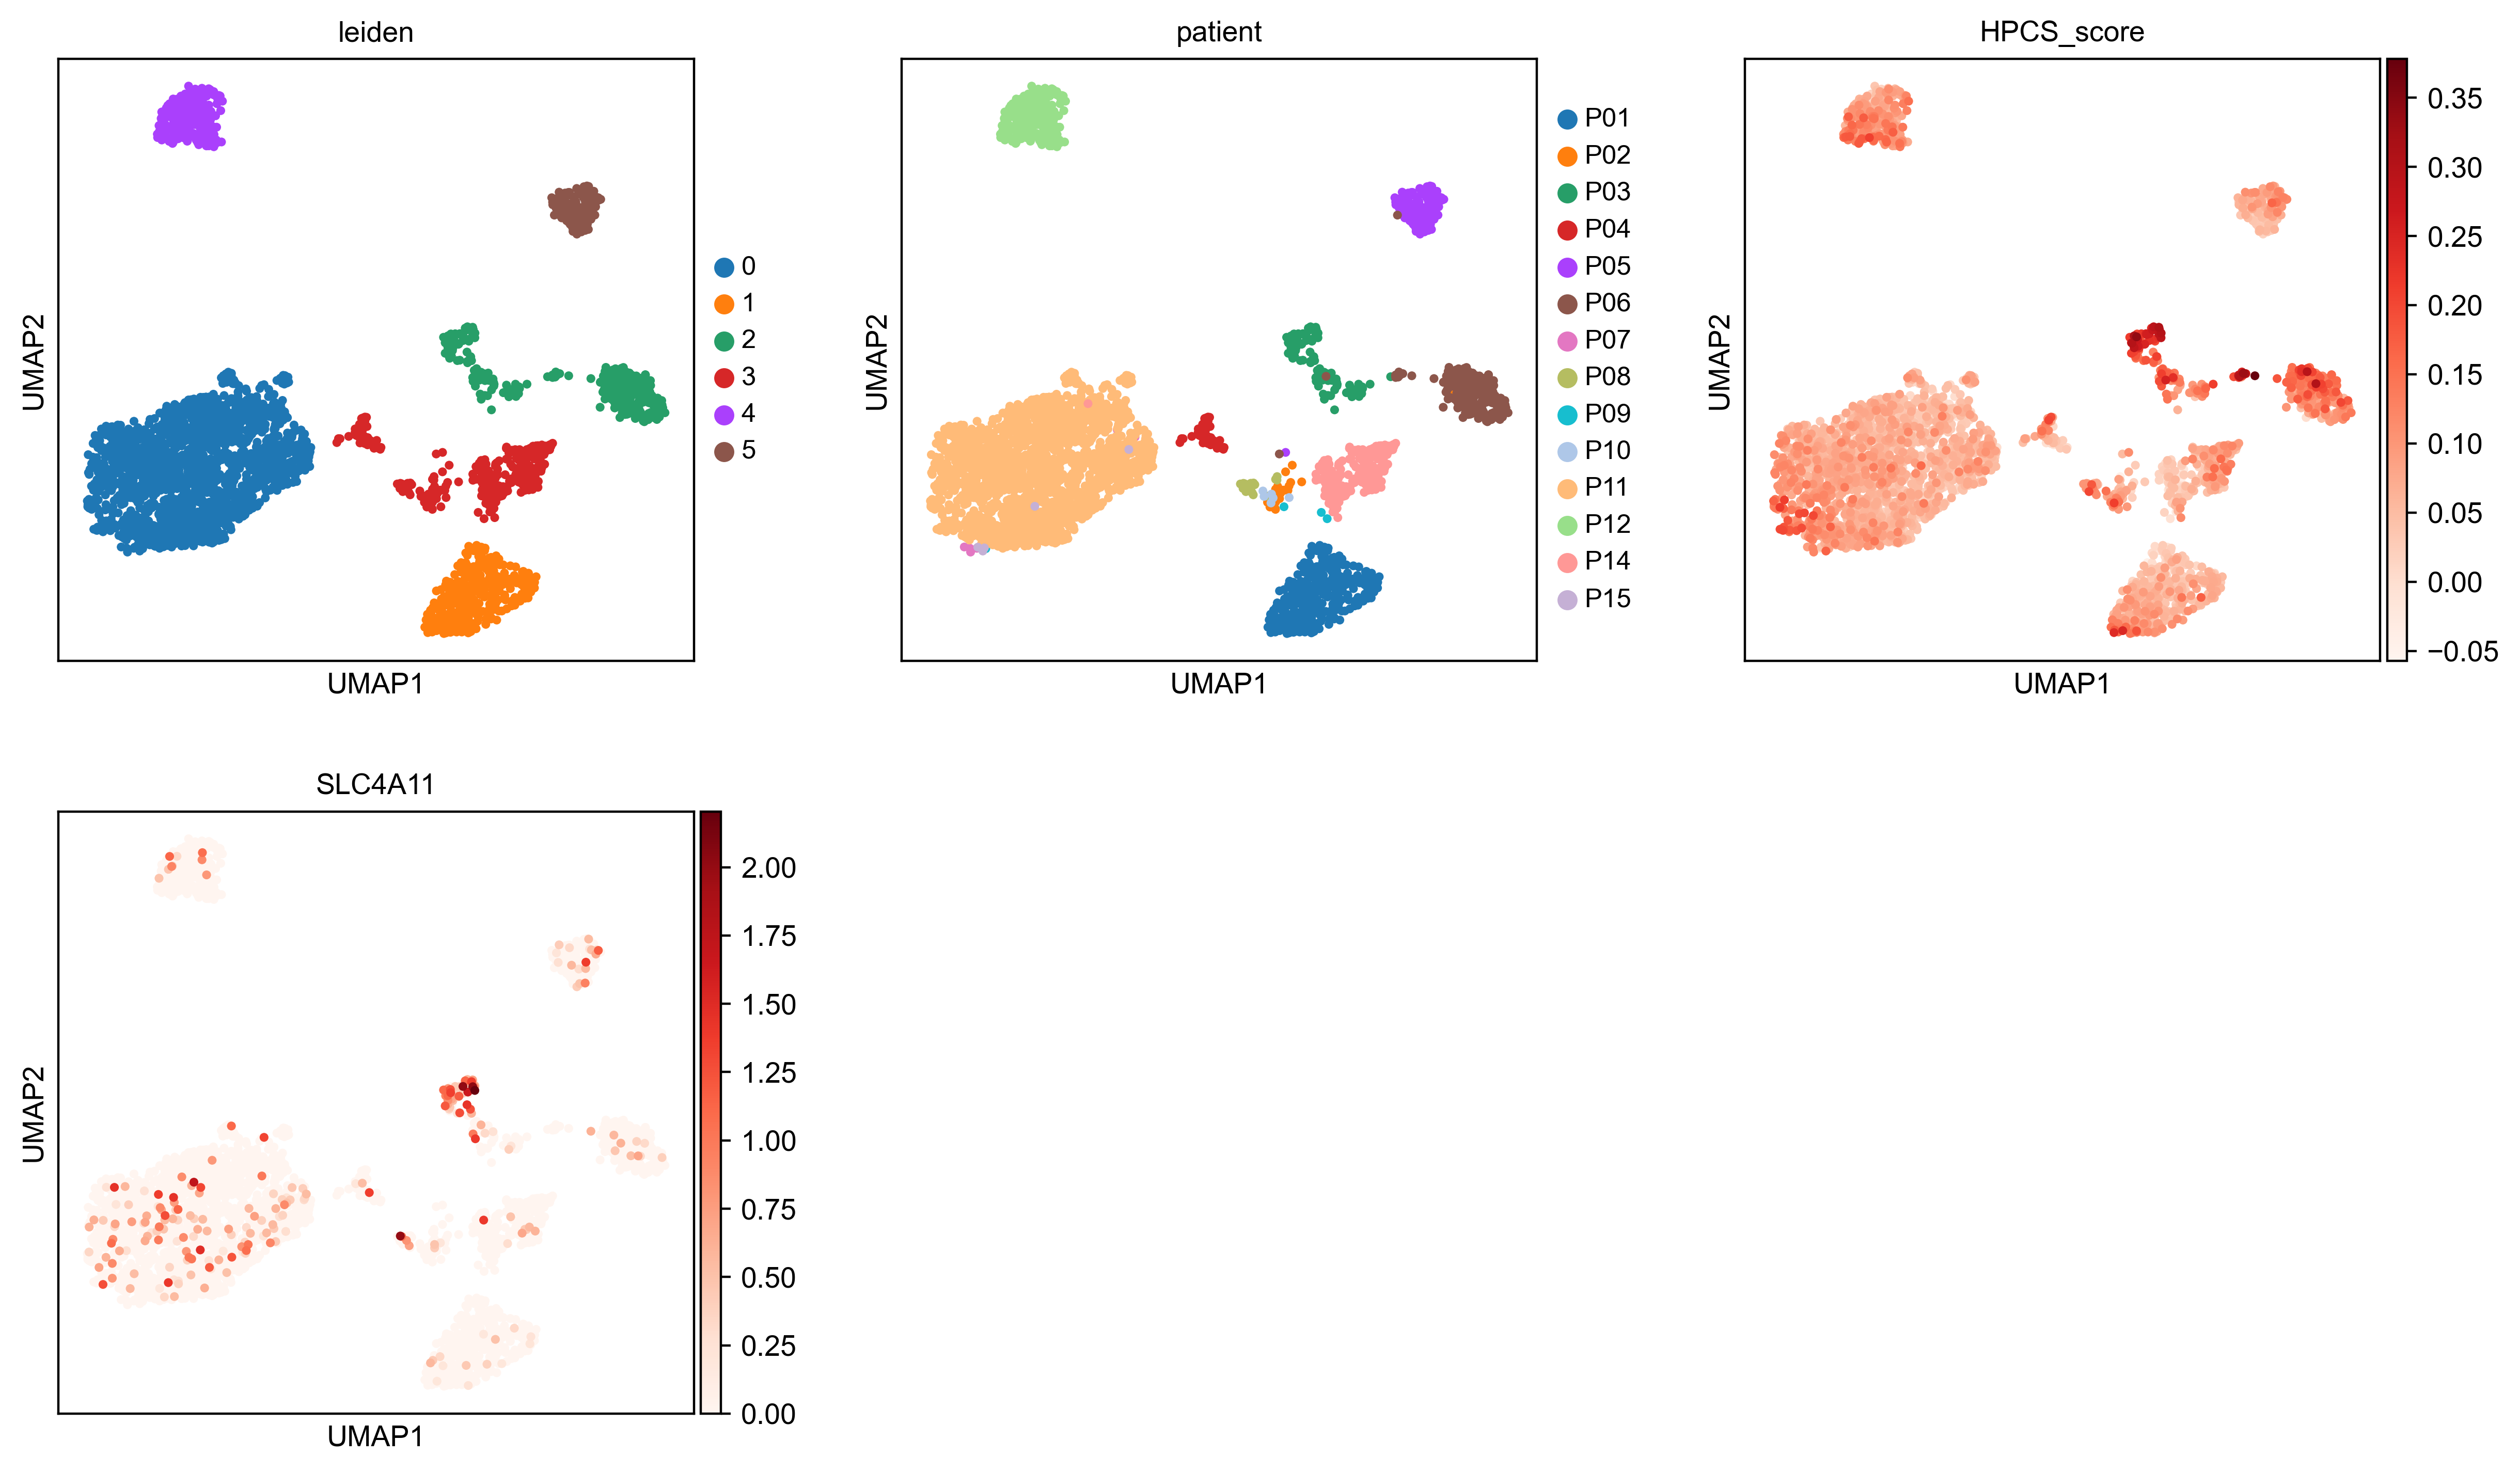

In [63]:
sc.pl.umap(adata, color=["leiden","patient","HPCS_score","SLC4A11"],ncols=3, cmap="Reds")

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

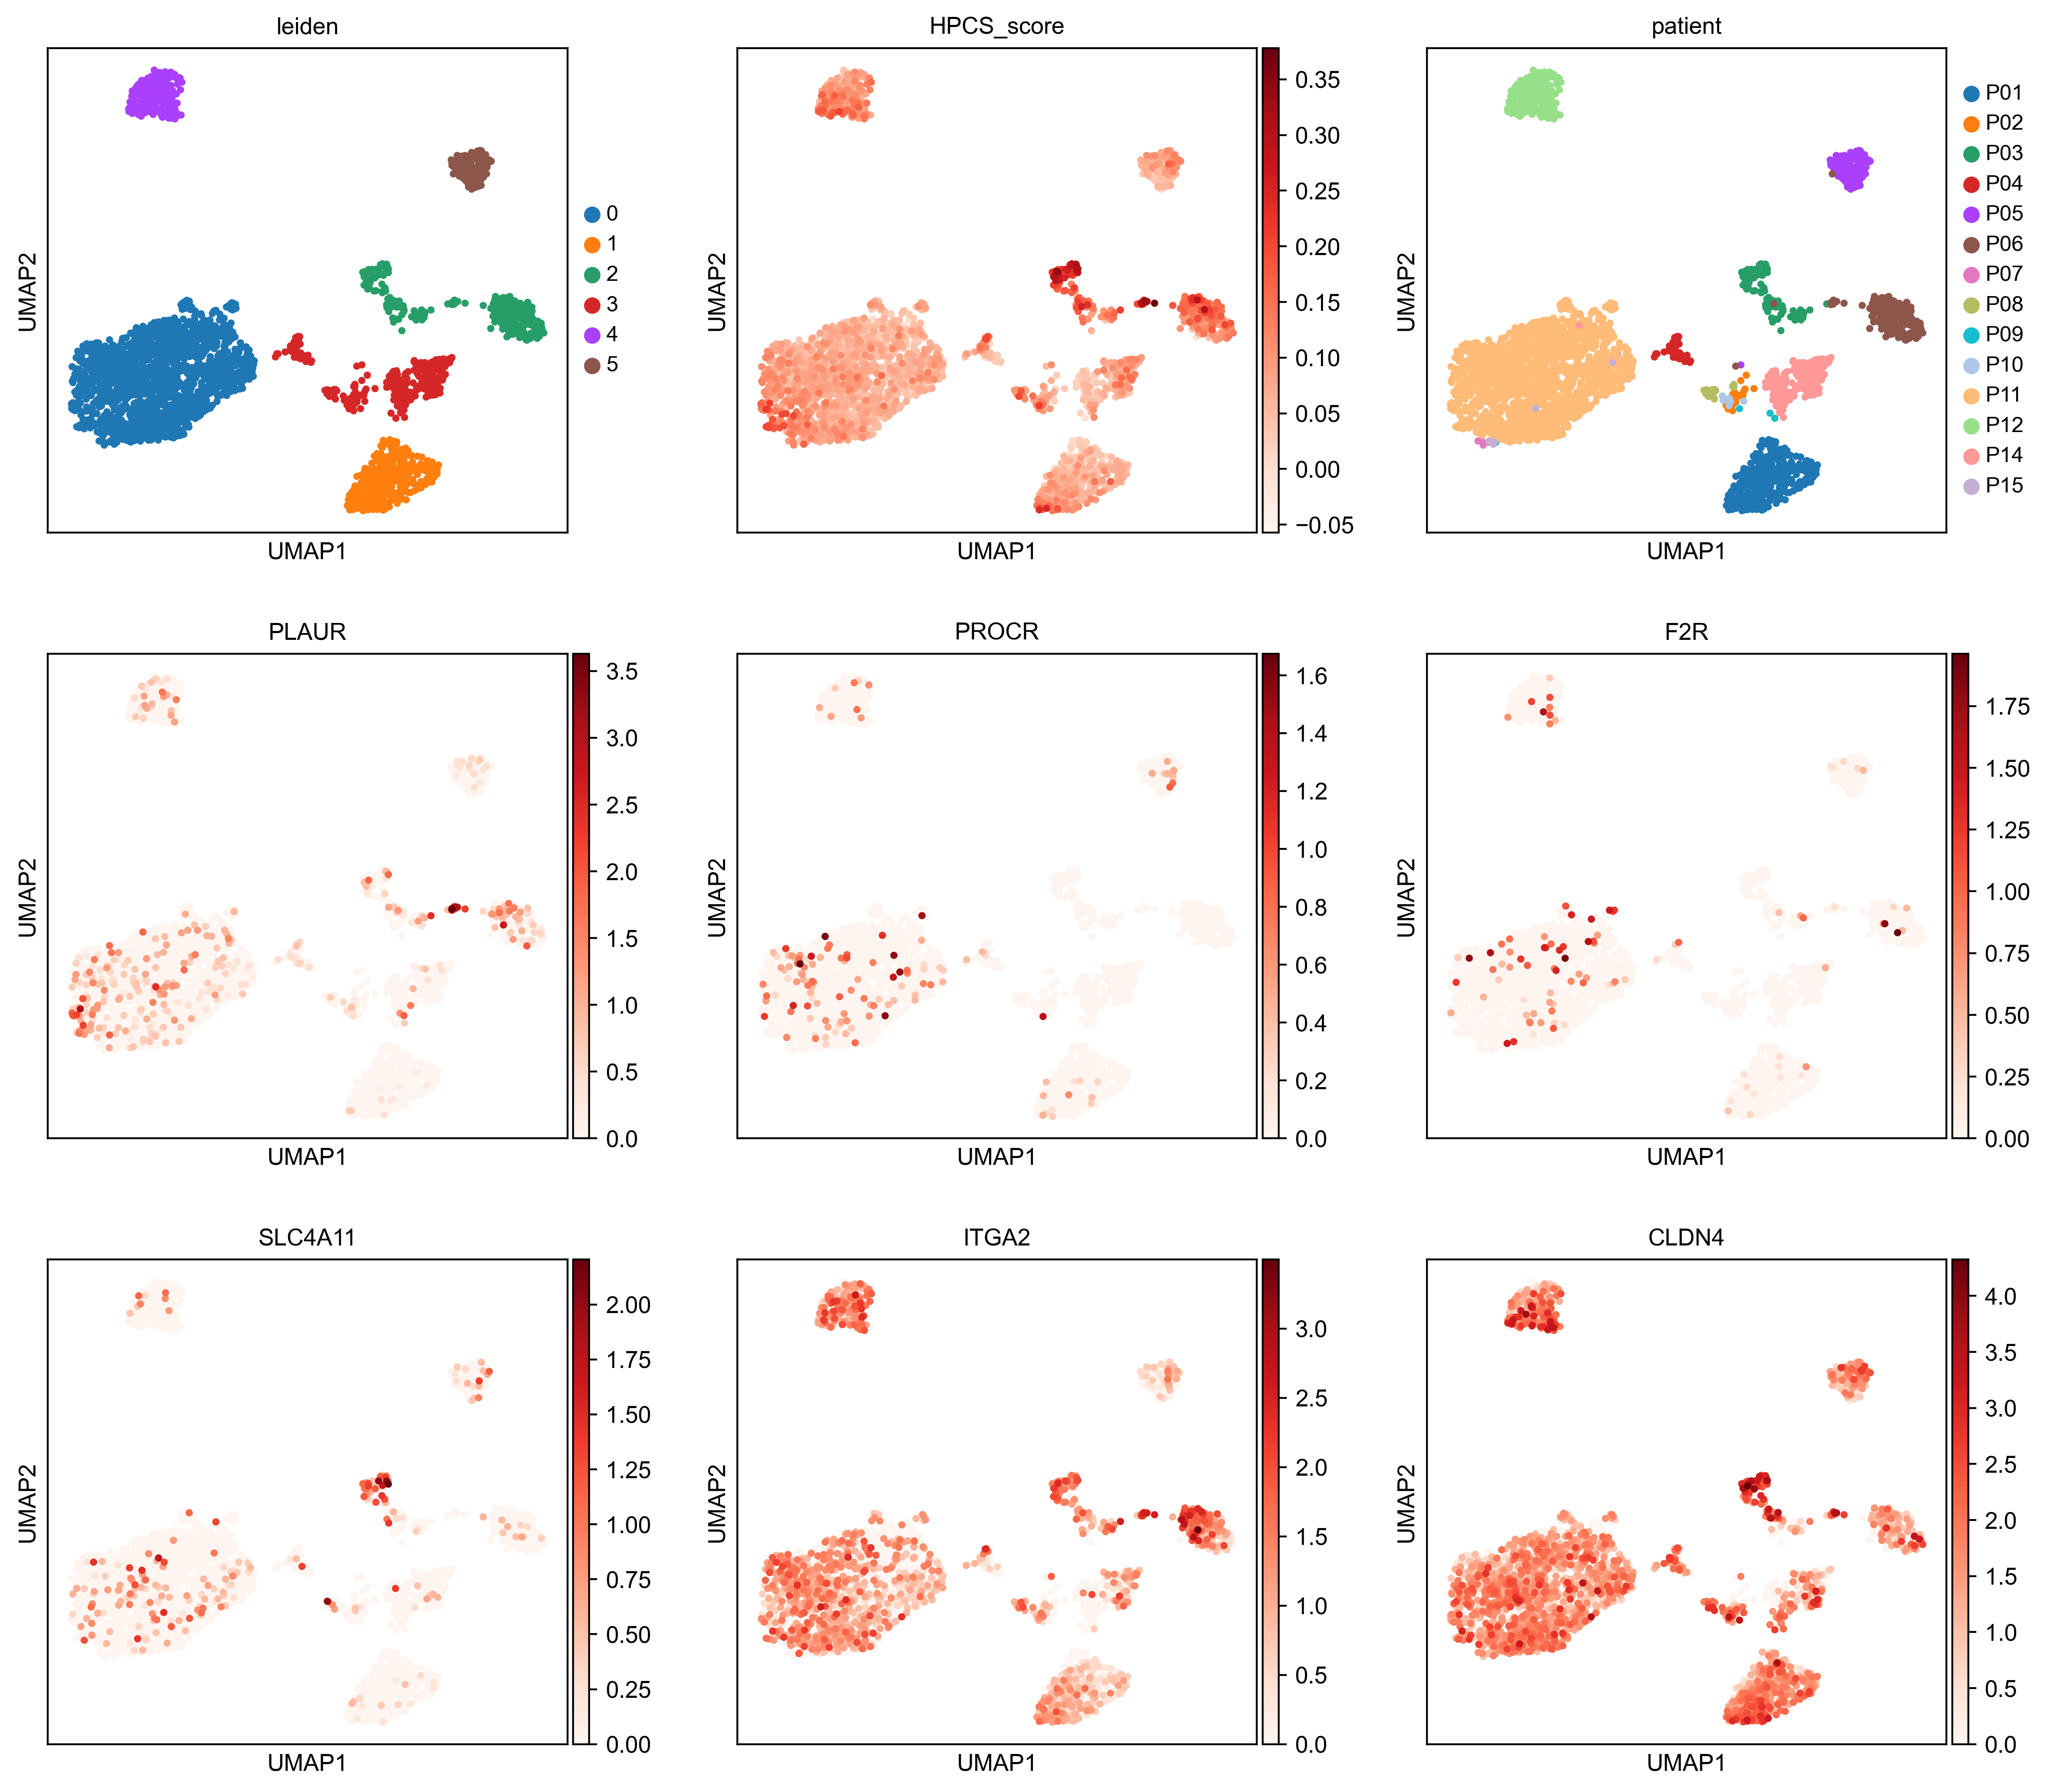

In [64]:
sc.pl.umap(adata, color=["leiden","HPCS_score","patient","PLAUR", "PROCR", "F2R", "SLC4A11", "ITGA2", "CLDN4"],ncols=3, cmap="Reds")

In [65]:
resultsFile

'write/Data_Chen2020_Head-and-Neck.h5ad'

In [66]:
adata.write(resultsFile)
adata

AnnData object with n_obs × n_vars = 3152 × 1938
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'patient', 'diagnosis', 'cancerType', 'sex', 'site', 'HPCS_score'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'patient_colors', 'rank_genes_groups', 'dendrogram_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

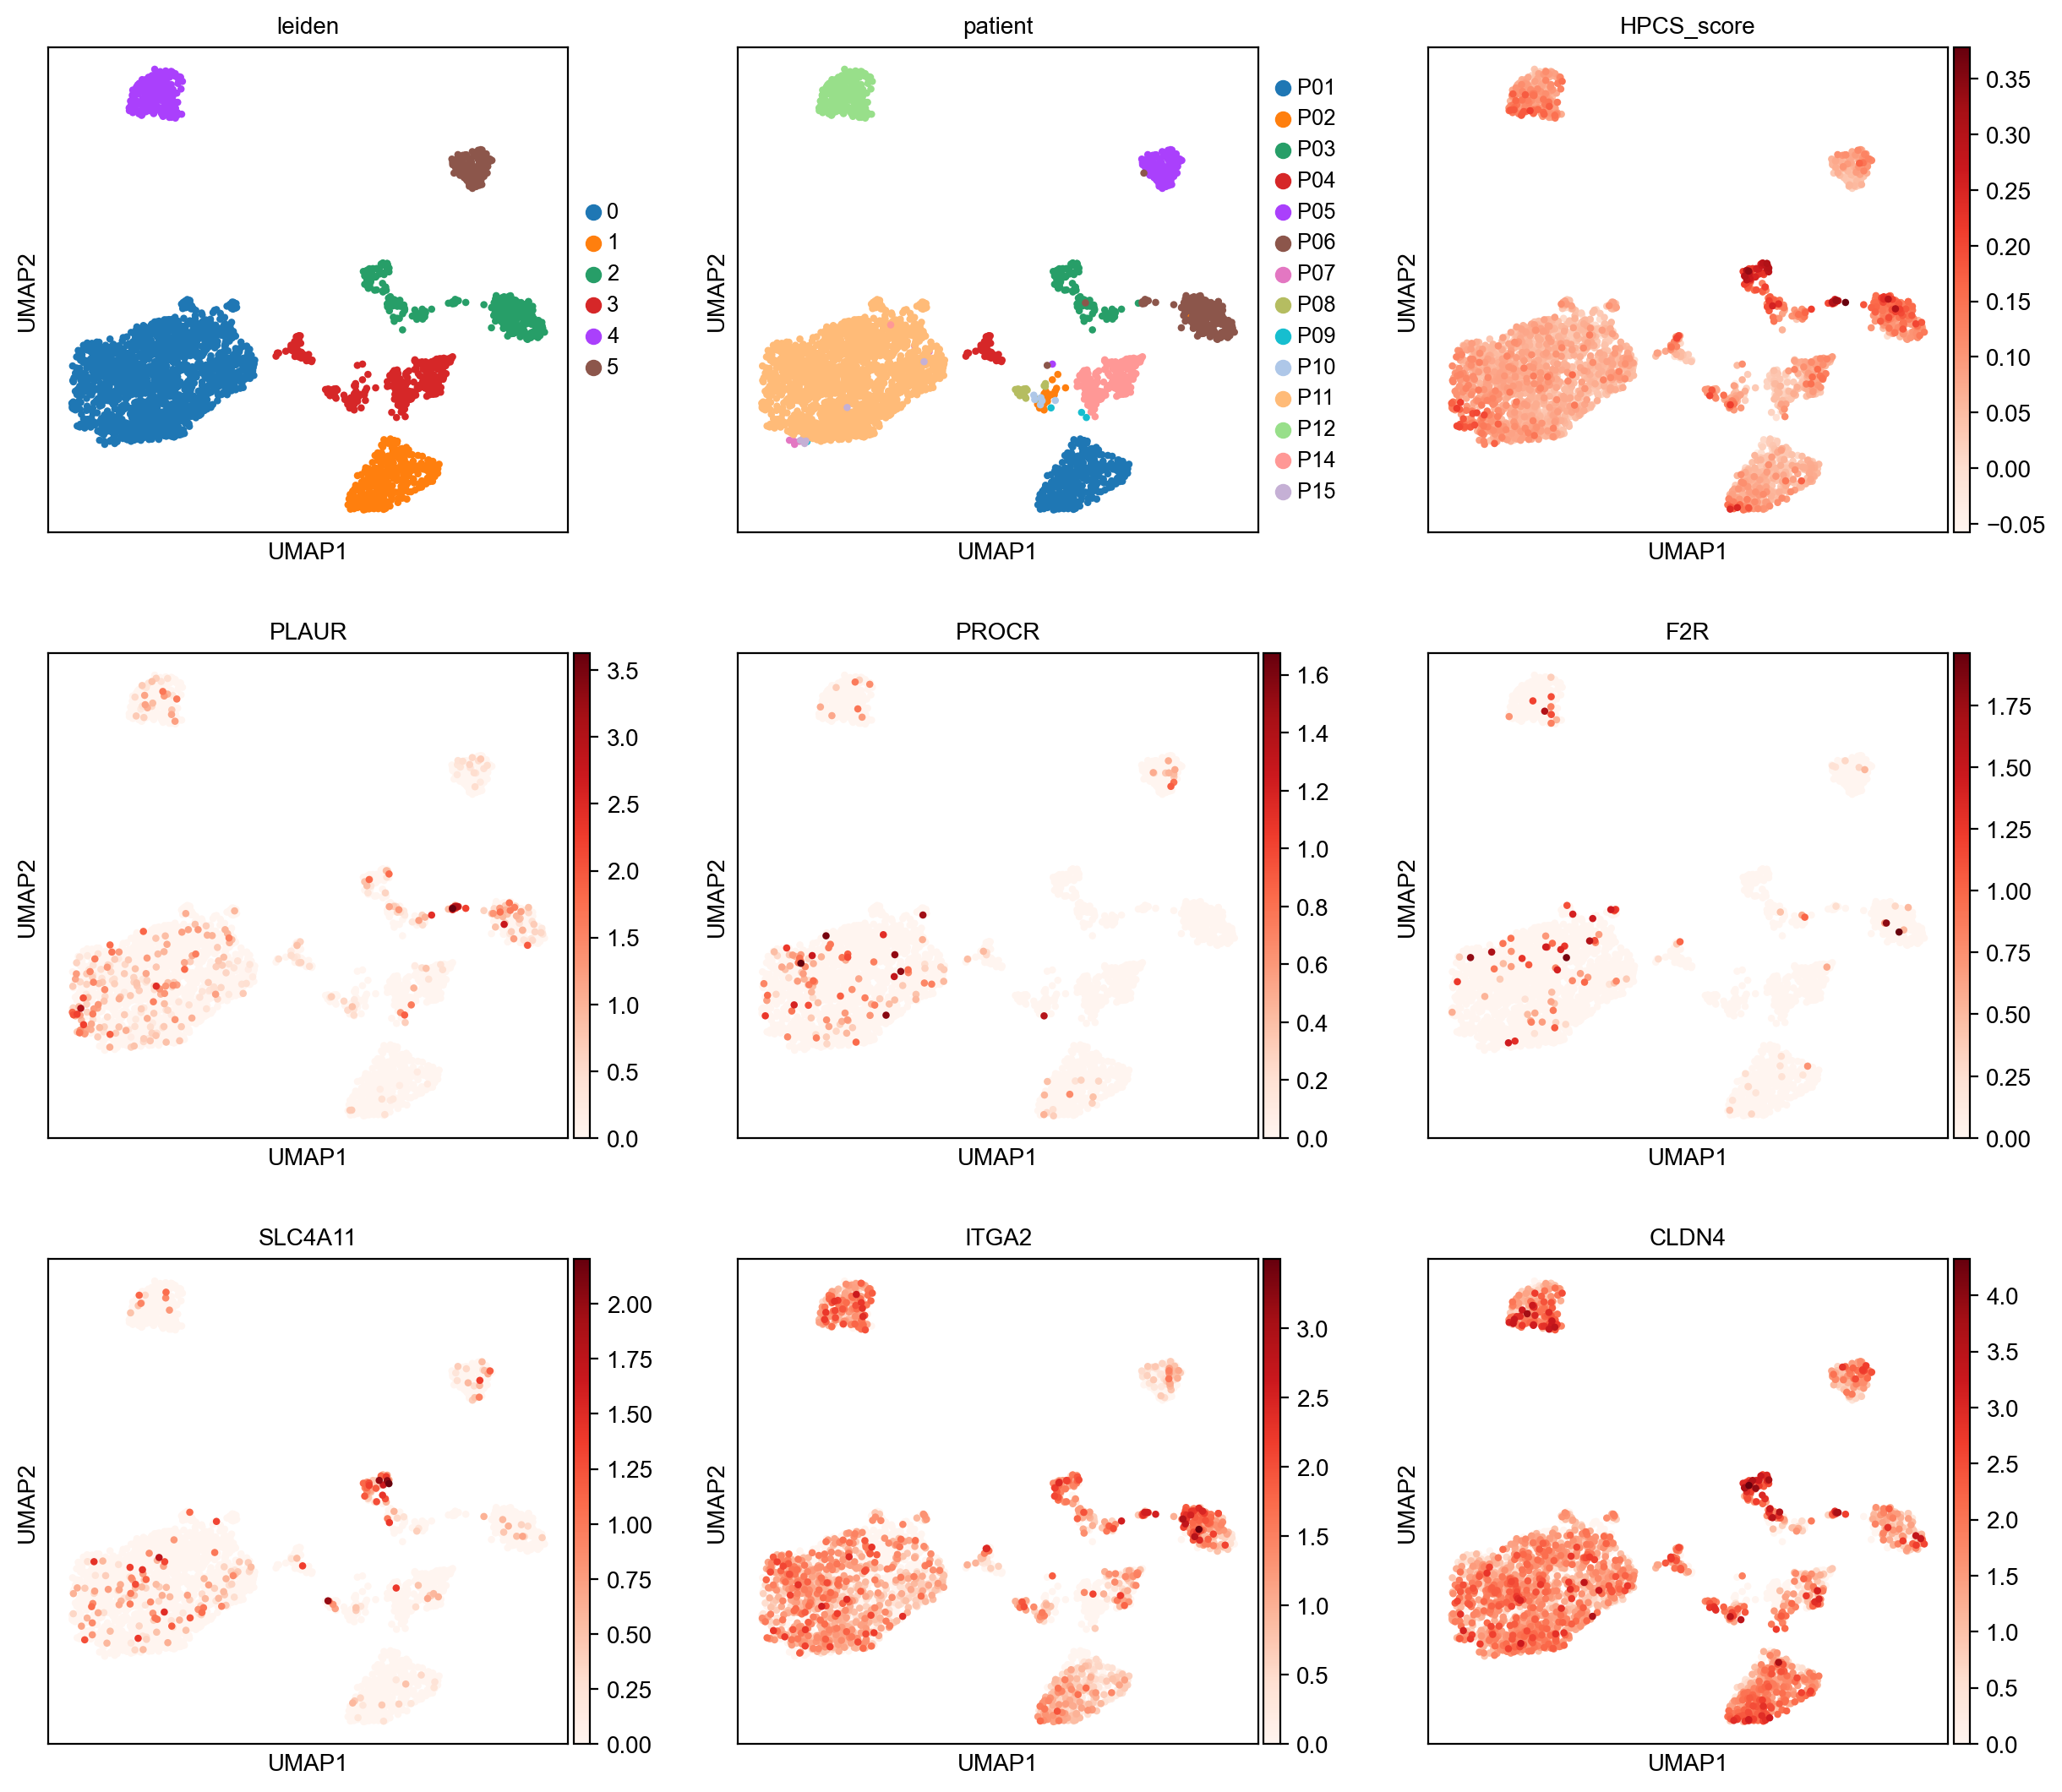

In [8]:
import scanpy as sc
writeDir = "write/"
fileName = "Data_Chen2020_Head-and-Neck"
resultsFile = writeDir + fileName + '.h5ad' 
adata = sc.read_h5ad(resultsFile)
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.pl.umap(adata, color=["leiden","patient","HPCS_score","PLAUR", "PROCR", "F2R", "SLC4A11", "ITGA2", "CLDN4"],ncols=3, cmap="Reds")


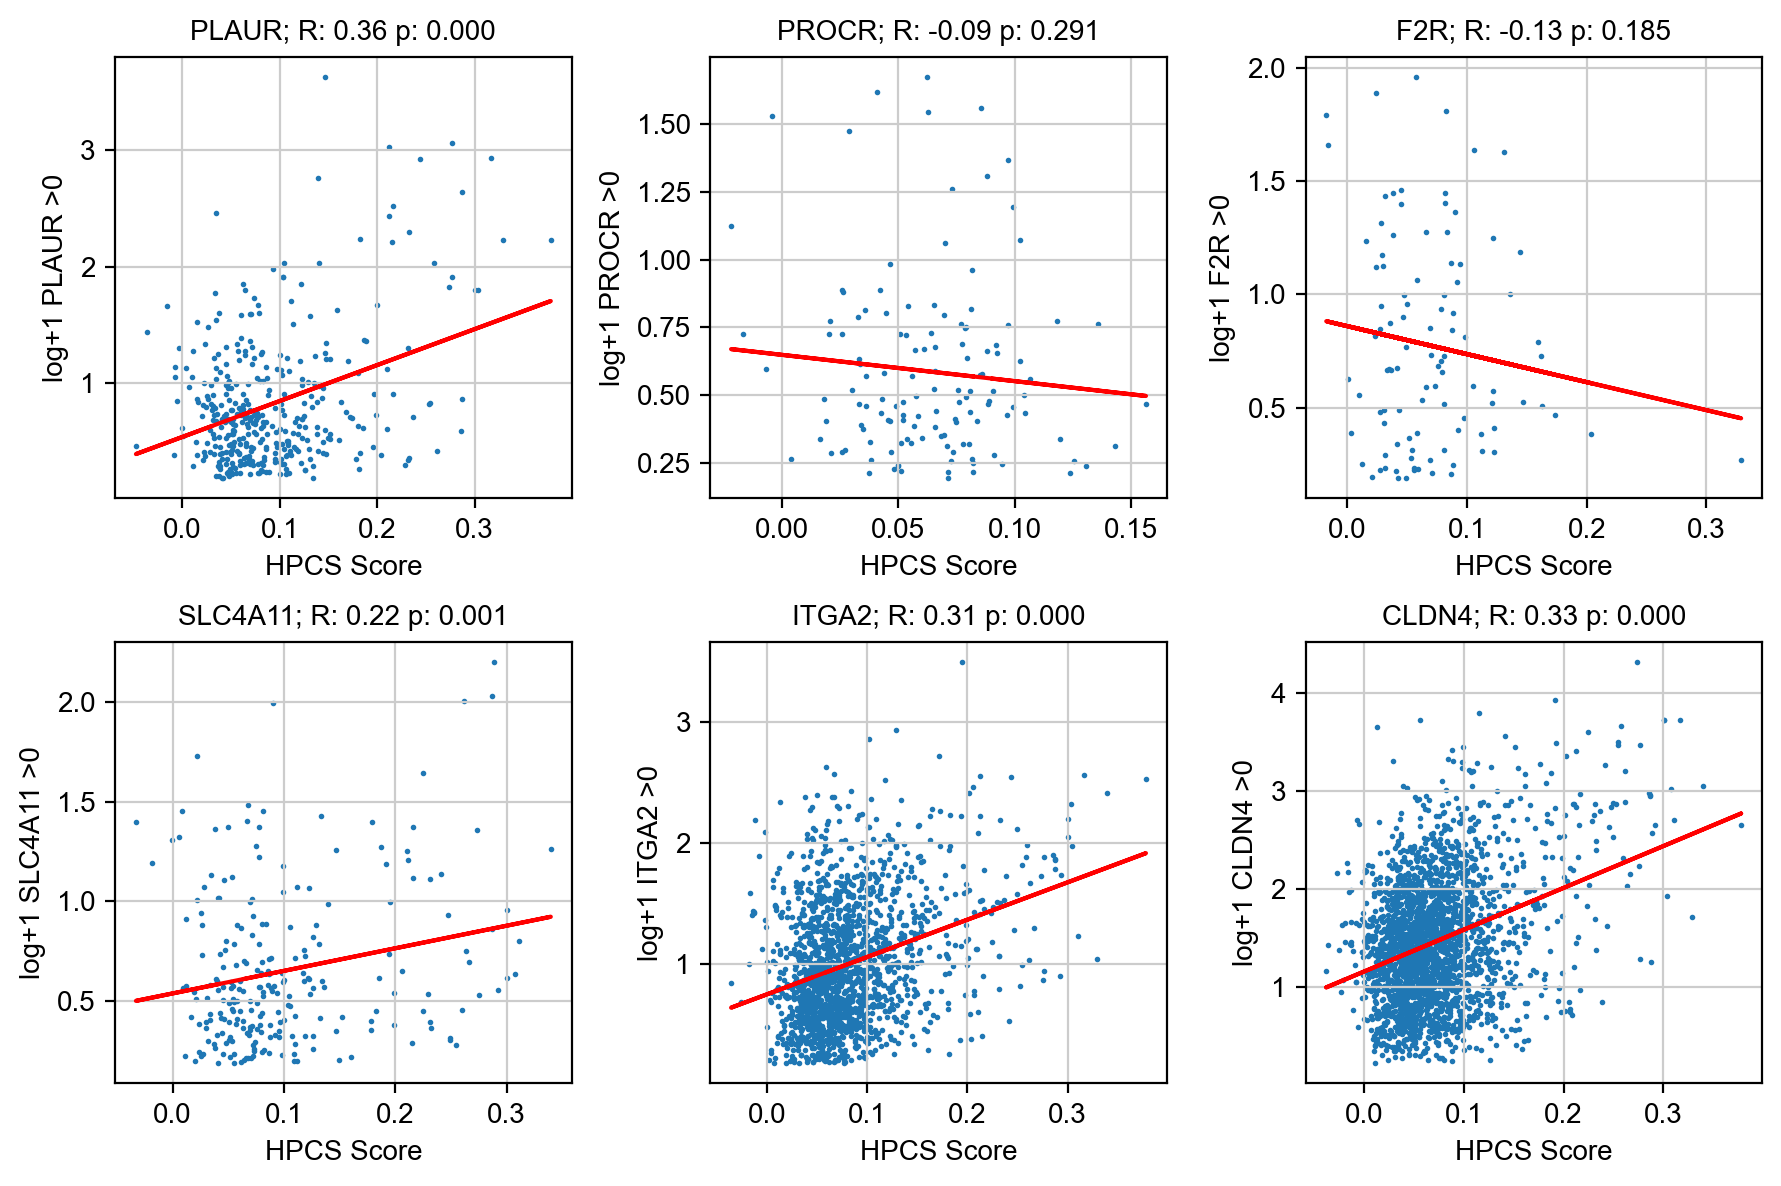

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import linregress

adatar = adata.raw.to_adata()

def plotExpvScore(gene, ax):
    geneExpr = np.array(adatar[:,adatar.var_names==gene].X.todense().flatten())[0]
    
    x = adata.obs.HPCS_score.values[geneExpr>0]
    y = geneExpr[geneExpr>0]
    
    # Fit linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    #print(slope, intercept, r_value, p_value, std_err)
    
    # Calculate confidence interval
    confidence_interval = 1.96 * std_err  # 95% confidence interval
    
    # Create scatter plot
    ax.scatter(x, y, label="Data points", s=1)
    
    # Plot regression line
    ax.plot(x, slope * x + intercept, color='red', label="Regression line")
    
    ## Plot confidence interval
    #ax.fill_between(x, slope * x + intercept - confidence_interval, slope * x + intercept + confidence_interval, color='blue', alpha=0.3, label="Confidence interval")
    
    # Add labels and title
    ax.set_title(f"{gene}; R: {r_value:.2f} p: {p_value:.3f}")
    ax.set_xlabel("HPCS Score")
    ax.set_ylabel(f"log+1 {gene} >0")

    return(r_value)

genes = ["PLAUR", "PROCR", "F2R", "SLC4A11", "ITGA2", "CLDN4"]
rvals = np.zeros(len(genes))
fig, axs = plt.subplots(2,3, figsize=(9,6))

for i,ax in enumerate(axs.flatten()):
    rvals[i] = plotExpvScore(genes[i], ax)

fig.tight_layout()

pd.DataFrame(rvals, index=genes, columns=[fileName]).to_csv(f"{writeDir}/hpcsCorr/{fileName}_GeneRs.csv")

In [92]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib import cm, colors
from sklearn.metrics.pairwise import cosine_similarity
from scipy import stats
from sklearn import preprocessing

def readAdata(inDir, sufix, genes):
    print(sufix)
    inputCellsFile = f'{inDir}/Cells{sufix}.csv'
    inputMtxFile = f'{inDir}/Exp_data_UMIcounts{sufix}.mtx'
    cells =  pd.read_table(inputCellsFile, delimiter=",", index_col=0)
    
    adata = sc.read_mtx(inputMtxFile).T
    
    adata.obs = cells
    adata.var = genes
    
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    adata = adata[adata.obs.cell_type=="Malignant"]
    return(adata)


def makeVenns(mouseGS, otherCS, name, save=False):
    allInters = []
    for mgs in mouseGS: 
        inter = set(mouseGS[mgs].dropna()).intersection(set(otherCS))
        gsNum, hpcsNum, overNum = len(mouseGS[mgs].dropna()), len(otherCS), len(inter)
        
        # Define the subsets
        subsets = (gsNum-overNum,hpcsNum-overNum, overNum)  # (only in set1, only in set2, in both)
        
        # Create a Venn diagram
        venn = venn2(subsets=subsets, set_labels=(mgs, name))
        
        # Display the plot
        plt.show()
        allInters.append(inter)
    if(save):
        plt.savefig(f"figures/Final/{name}{mgs}_venn.svg")
        pd.DataFrame(allInters, index=mouseGS.columns).T.to_csv(f"{save}/{name}_intersections.csv")


def plotCorr(name, corrScorePear, corrScoreSign, corrName="HPCS", figsize=(5,5), save=False):
    fig, ax = plt.subplots(figsize=figsize) 
    plt.grid(False)
    sns.heatmap(corrScorePear, cmap="bwr", xticklabels=True, ax=ax, vmax=1, vmin=-1, square=True, linewidths=0.1, cbar=False)
    
    for (i, j), significant in np.ndenumerate(corrScoreSign):
        if significant < 0.001:
            plt.text(j + 0.5, i + 0.5, "●", color='black', ha='center', va='center', fontsize=12)
        elif significant < 0.05:
            plt.text(j + 0.5, i + 0.5, 'o', color='black', ha='center', va='center', fontsize=12)
    
    ax.set_title(f"Pearson Correlation of {corrName} score with other Cell State Scores")
    ax.tick_params(axis='y', labelrotation=0)
    fig.text(1, 0.4, f"P-Value\no < 0.05\n● < 0.001")
    fig.tight_layout()
    plt.show()
    if(save):
        fig.savefig(f"{save}/{name}_pearCorr{corrName}vO.svg")




def plotHeatmap(data, name, title, xlabel, ylabel, save=False):
    fig, axs = plt.subplots(nrows=1, ncols=len(data[0])+1, figsize=(6,2)) 
    plt.grid(False)
    vmax, vmin = np.max(data), np.min(data)
    for i,ax in enumerate(axs):
        if(i >= len(data[0])):
            ax.axis("off")
            break
        sns.heatmap(data[:,i].reshape(2,1), cmap="bwr", xticklabels=True, ax=ax, square=True, linewidths=0.1, vmax=vmax, vmin=vmin, cbar=False)#cbar_kws={"shrink": 0.5})
        ax.set_xticklabels(xlabel)
        ax.set_yticklabels([ylabel[i],"Other"])
        #ax.set_ylabel(ylabel)
    
    norm = colors.Normalize(vmin, vmax)
    fig.suptitle(f"{title} Expression")
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=plt.colormaps["bwr"]), ax=ax)
    fig.tight_layout()
    plt.show()
    if(save):
        fig.savefig(f"{save}/{name}_{title}avgExpVo.svg")


def plotScatter(df, xLabel, yLabel, name, save=False):
    xVal, yVal = adata.obs[xLabel].values, adata.obs[yLabel].values
    m, b, r_value, p_value, std_err = stats.linregress(xVal, yVal)
    
    fig, ax = plt.subplots()
    ax.grid(False)
    ax.scatter(xVal,yVal)
    ax.plot(xVal, m*xVal + b, c="red")
    ax.annotate(f"r^2: {r_value**2:.2f}", xy=(-0.05,np.max(yVal)*0.95))
    ax.annotate(f"pVal: {p_value:.2f}", xy=(-0.05,np.max(yVal)*0.9))

    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_title(name)
    plt.show()
    if(save):
        fig.savefig(f"{save}/{name}_{xLabel}{yLabel}_scatter.svg")



def plotBoxPlot(dataDF, label, geneExp, name, save=False):
    slcPos = adata.obs[label].values[geneExp]
    slcNeg = adata.obs[label].values[np.logical_not(geneExp)]

    # Create a figure and axis
    fig, ax = plt.subplots()
    ax.grid(False)
    # Create box plots
    box1 = ax.violinplot(slcPos, positions=[1], showmeans=True, widths=0.6)
    box2 = ax.violinplot(slcNeg, positions=[2], showmeans=True, widths=0.6)
    
    # Perform a t-test to get the p-value
    t_stat, p_val = stats.ttest_ind(slcPos, slcNeg)
    
    # Add p-value bracket and stars to the plot
    x1, x2 = 1, 2
    y, h, col = max(np.max(slcPos), np.max(slcNeg)), 0.1, 'k'
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h-0.1, f'{p_val:.3e}', ha='center', va='bottom', color=col)
    
    # Add stars based on p-value significance
    if p_val < 0.001:
        stars = '***'
    elif p_val < 0.01:
        stars = '**'
    elif p_val < 0.05:
        stars = '*'
    else:
        stars = 'ns'  # not significant
    
    ax.text((x1+x2)*.5, y+h, stars, ha='center', va='bottom', color=col)
    
    # Add p-value text to the plot
    #plt.text(1.5, max(np.max(slcPos), np.max(slcNeg)), f'p-value: {p_val:.3e}', ha='center')
    
    # Set x-axis labels
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Slc4a11+', 'Slc4a11-'])
    
    # Set title and labels
    ax.set_title(name)
    ax.set_ylabel(f'{label} Score')
    
    # Show the plotå
    plt.show()
    if(save):
        fig.savefig(f"{save}/{name}{label}_boxSlc4a11.svg")
    

def getCorrDataGS(adataFiles, dfGS, hpcs=False, gene=False):
    corrScore = np.zeros((2,len(adataFiles),len(dfGS.columns)))
    cosScore = np.zeros((len(adataFiles),len(dfGS.columns)))
        
    for j,adataFile in enumerate(adataFiles):
        adata = sc.read_h5ad(adataFile)
        human = sum([g == g.upper() for g in adata.var_names])>100
        if(gene):
            if(human):
                gene = gene.upper()
            rdata = adata.raw.to_adata()
            if(isinstance(rdata.X, np.ndarray)):
                geneScore = np.array(rdata[:,rdata.var_names==gene].X).flatten() 
            else:
                geneScore = np.array(rdata[:,rdata.var_names==gene].X.todense()).flatten() 
        elif(hpcs):
            if(human):
                hpcs = [str(gen).upper() for gen in hpcs]
            sc.tl.score_genes(adata, hpcs, score_name="HPCS")
        #pdb.set_trace()
        for gs in dfGS:
            gsList = dfGS[gs].dropna().values
            if(human):
                gsList = [str(gene).upper() for gene in gsList]
            sc.tl.score_genes(adata, gsList, score_name=gs)

        #import pdb;
        for i,gs in enumerate(dfGS):
            if(gene):
                corrScore[0,j,i], corrScore[1,j,i] = stats.pearsonr(geneScore, adata.obs[gs].values)
                cosScore[j,i] = cosine_similarity(geneScore.reshape(1, -1), adata.obs[gs].values.reshape(1, -1))[0][0]
            else:
                corrScore[0,j,i], corrScore[1,j,i] = stats.pearsonr(adata.obs["HPCS"].values, adata.obs[gs].values)
                cosScore[j,i] = cosine_similarity(adata.obs["HPCS"].values.reshape(1, -1), adata.obs[gs].values.reshape(1, -1))[0][0]
        break
        
    adataNames = [adataFile.split(".")[0] for adataFile in adataFiles]
    
    corrScorePear = pd.DataFrame(corrScore[0,:,:].T, columns = adataNames, index=dfGS.columns)
    corrScoreSign = corrScore[1,:,:].T
    return(corrScorePear, corrScoreSign)

def getCorrDataGSadata(adata, dfGS, name="adata", gene=False):
    corrScore = np.zeros((2,1,len(dfGS.columns)))
    cosScore = np.zeros((1,len(dfGS.columns)))

    human = sum([g == g.upper() for g in adata.var_names])>100
    if(gene):
        if(human):
            gene = gene.upper()
        rdata = adata.raw.to_adata()
        if(isinstance(rdata.X, np.ndarray)):
            geneScore = np.array(rdata[:,rdata.var_names==gene].X).flatten() 
        else:
            geneScore = np.array(rdata[:,rdata.var_names==gene].X.todense()).flatten() 
    
    #pdb.set_trace()
    for gs in dfGS:
        if (gs not in adata.obs):
            gsList = dfGS[gs].dropna().values
            if(human):
                gsList = [str(gene).upper() for gene in gsList]
            sc.tl.score_genes(adata, gsList, score_name=gs)

    #import pdb;
    for i,gs in enumerate(dfGS):
        if(gene):
            corrScore[0,0,i], corrScore[1,0,i] = stats.pearsonr(geneScore, adata.obs[gs].values)
            cosScore[0,i] = cosine_similarity(geneScore.reshape(1, -1), adata.obs[gs].values.reshape(1, -1))[0][0]
        else:
            corrScore[0,0,i], corrScore[1,0,i] = stats.pearsonr(adata.obs["HPCS"].values, adata.obs[gs].values)
            cosScore[0,i] = cosine_similarity(adata.obs["HPCS"].values.reshape(1, -1), adata.obs[gs].values.reshape(1, -1))[0][0]
            
    corrScorePear = pd.DataFrame(corrScore[0,:,:].T, columns = [name], index=dfGS.columns)
    corrScoreSign = corrScore[1,:,:].T
    return(corrScorePear, corrScoreSign)

def getPerCorrHPCS(adataFile, inGenes, dfGS, save=False):
    datasetNames = dfGS.columns
    genes = inGenes

    perScores = np.zeros((2,len(datasetNames),2))
    avgScores = np.zeros((len(datasetNames),len(inGenes)*2))
    pvalScores = np.zeros((len(datasetNames),len(inGenes)))

    adata = sc.read_h5ad(f"{adataFile}")
    human=sum([g==g.upper() for g in adata.var_names])>100
    rdata = adata.raw.to_adata()

    for i, datasetName in enumerate(datasetNames):
        geneList = dfGS.iloc[:,i].values
        if(human):
            geneList = [str(gene).upper() for gene in geneList]
            genes = [g.upper() for g in genes]
        sc.tl.score_genes(adata, geneList, score_name=datasetName)


    for gi, gene in enumerate(genes):
        corrOut = getCorrDataGSadata(adata, dfGS, name="", gene=gene)
        #import pdb; pdb.set_trace()
        for i, datasetName in enumerate(datasetNames):
            perScores[0,i,gi], perScores[1,i,gi] = corrOut[0].values[i][0], corrOut[1][i][0]
		

        if(isinstance(rdata.X, np.ndarray)):
            geneExp = np.array(rdata[:,rdata.var_names==gene].X).flatten() > 0
        else:
            geneExp = np.array(rdata[:,rdata.var_names==gene].X.todense()).flatten() > 0

        for gsi, gs in enumerate(datasetNames):
            geneExpPos = adata.obs[gs][geneExp]
            geneExpNeg = adata.obs[gs][np.logical_not(geneExp)]
			
            avgScores[gsi,gi*2] = np.mean(geneExpPos)
            avgScores[gsi,gi*2+1] = np.mean(geneExpNeg)
	
            t_stat, p_val = stats.ttest_ind(geneExpPos, geneExpNeg)
            pvalScores[gsi,gi] = p_val
	
	#perCorrs = pd.DataFrame(perScores[0,:,:], index=datasetNames, columns=genes)
    return(perScores, avgScores, pvalScores, adata)


def plotBoxGeneUmap(adata, gene, colorPlot, name, save=False): 
    rdata = adata.raw.to_adata()
    
    if(isinstance(rdata.X, np.ndarray)):
        geneScore = np.array(rdata[:,rdata.var_names==gene].X).flatten() > 0
    else:
        geneScore = np.array(rdata[:,rdata.var_names==gene].X.todense()).flatten() > 0

    for geneSig in colorPlot:
        plotBoxPlot(adata.obs, geneSig, geneScore, name)

        fig, ax = plt.subplots()
        sc.pl.umap(adata, color=[geneSig], cmap="Reds", ax=ax, title=f"{geneSig} exp in {name}")

    fig, ax = plt.subplots()
    sc.pl.umap(adata, color=[gene], cmap="Reds", ax=ax, title=f"{gene} exp in {name}")

def plotZscore(avgScores, dfGS, save=False):
    scaler = preprocessing.StandardScaler().fit_transform(avgScores.T)
    avgScoresDF = pd.DataFrame(scaler[[1,0,3,2]].T, index=dfGS.columns.values, columns=['SLC4A11-', 'SLC4A11+', 'PLAUR-','PLAUR+']) #
    
    fig, ax = plt.subplots(figsize=(1.5,3)) 
    plt.grid(False)
    
    cbarMin=-1.0*np.max((np.abs(np.min(scaler)),np.abs(np.max(scaler))))
    cbarMax=np.max((np.abs(np.min(scaler)),np.abs(np.max(scaler))))
    
    sns.heatmap(avgScoresDF, cmap="bwr", xticklabels=True, ax=ax, square=True, linewidths=0.1, cbar=False, vmax=cbarMax, vmin=cbarMin)
    
    for (i, j), significant in np.ndenumerate(pvalScores):
        #print(i,j)
        if significant < 0.001:
            plt.text(j*2 + 1, i + 0.5, "●", color='black', ha='center', va='center', fontsize=12)
        elif significant < 0.05:
            plt.text(j*2 + 1, i + 0.5, 'o', color='black', ha='center', va='center', fontsize=12)
    
    ax.set_title(f"Z-score of gene signature score mean per gene")
    ax.tick_params(axis='y', labelrotation=0)
    fig.text(1, 0.2, f"P-Value\no < 0.05\n● < 0.001")
    #fig.tight_layout()
    plt.show()

In [11]:
sigFile = "data/geneSigs/multiGeneSig.xlsx"
hMultiGS = pd.read_excel(sigFile,sheet_name=2,skiprows=2)
stress = hMultiGS[["Stress"]].dropna().values.flatten()[:200]
len(stress)

200

In [12]:
sigFile = "data/geneSigs/nfkb.csv"
nfkb = pd.read_csv(sigFile).columns.values
len(nfkb)

200

In [13]:
sigFile = "../mhCompTiss/data/LUAD/humanLUADgeneSig.csv"
sigGenes = pd.read_csv(sigFile)
hpcs = sigGenes["hpcs"].values[:200]
len(hpcs)

200

In [14]:
dfGS = pd.DataFrame([nfkb,hpcs,stress], index=["Nfkb","HPCS","Stress"]).T
dfGS

Nfkb     HPCS      Stress
0      ABCA1  SLC4A11       ABHD3
1       AREG    IL23A  AC016629.8
2       ATF3     RRAD     ADAMTS1
3     ATP2B1      TNF     ANKRD28
4    B4GALT1    ABTB2     ANKRD37
..       ...      ...         ...
195    VEGFA     ST13        SIK1
196     YRDC    DDX54     SLC20A1
197   ZBTB10    RAB1A     SLC38A2
198  ZC3H12A     SYF2      SNHG12
199    ZFP36    RBMS1       SOCS1

[200 rows x 3 columns]

In [35]:
getCorrDataGS([resultsFile], dfGS)

computing score 'Nfkb'
    finished: added
    'Nfkb', score of gene set (adata.obs).
    1135 total control genes are used. (0:00:00)
computing score 'HPCS'
    finished: added
    'HPCS', score of gene set (adata.obs).
    1041 total control genes are used. (0:00:00)
computing score 'Stress'
    finished: added
    'Stress', score of gene set (adata.obs).
    1082 total control genes are used. (0:00:00)


(        write/Data_Chen2020_Head-and-Neck
 Nfkb                             0.613618
 HPCS                             1.000000
 Stress                           0.599507,
 array([[0.00000000e+000],
        [0.00000000e+000],
        [5.50086925e-307]]))

In [45]:
genes = ["SLC4A11","PLAUR"]
perScores, avgScores, pvalScores, adata = getPerCorrHPCS(resultsFile, genes, dfGS)

computing score 'Nfkb'
    finished: added
    'Nfkb', score of gene set (adata.obs).
    1135 total control genes are used. (0:00:00)
computing score 'HPCS'
    finished: added
    'HPCS', score of gene set (adata.obs).
    1041 total control genes are used. (0:00:00)
computing score 'Stress'
    finished: added
    'Stress', score of gene set (adata.obs).
    1082 total control genes are used. (0:00:00)


In [46]:
perCorrs = pd.DataFrame(perScores[0,:,:], index=dfGS.columns.values, columns=genes)
perCorrs

SLC4A11     PLAUR
Nfkb    0.046489  0.270204
HPCS    0.225059  0.248699
Stress  0.060515  0.190497

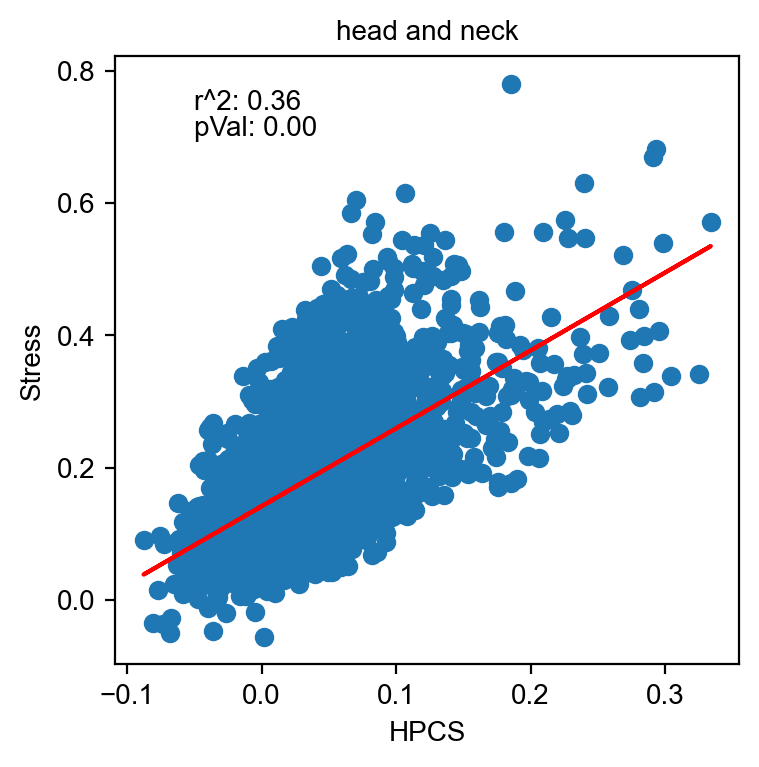

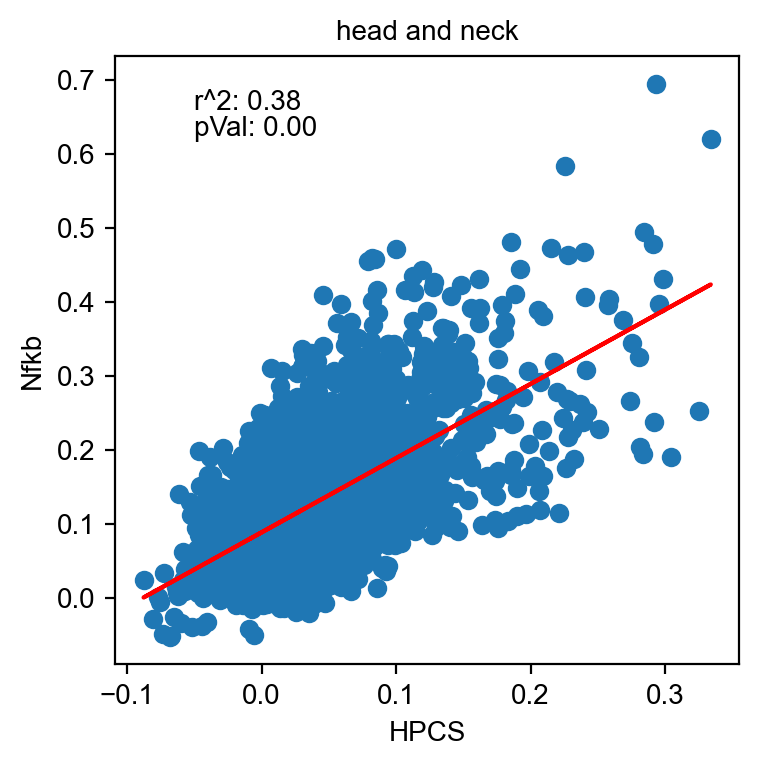

In [49]:
plotScatter(adata.obs, "HPCS", "Stress", "head and neck")
plotScatter(adata.obs, "HPCS", "Nfkb", "head and neck")

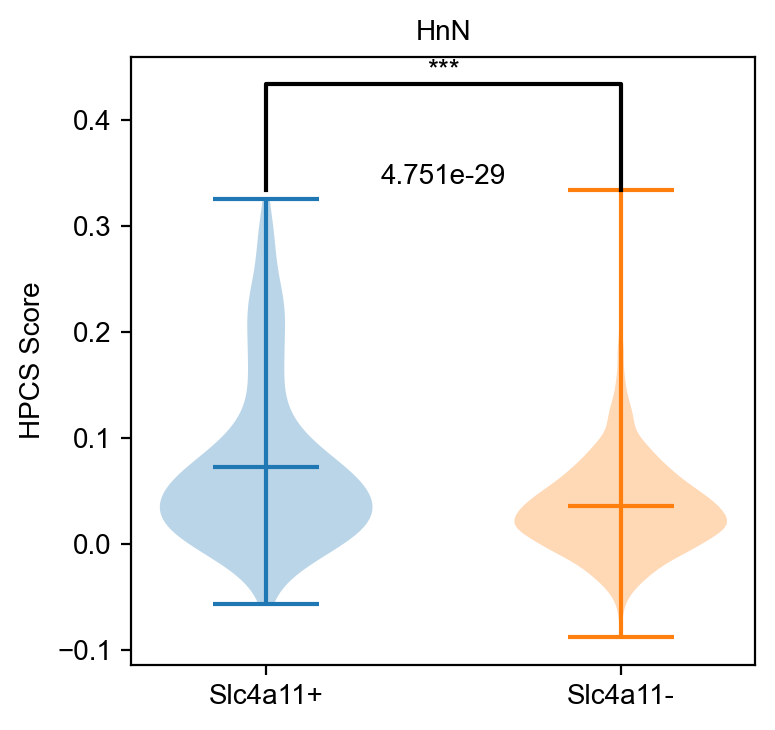

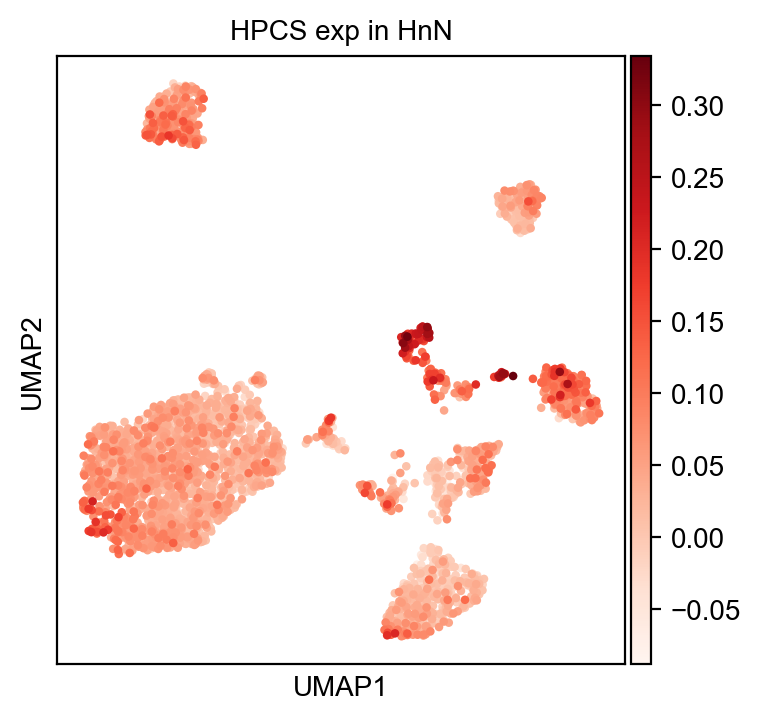

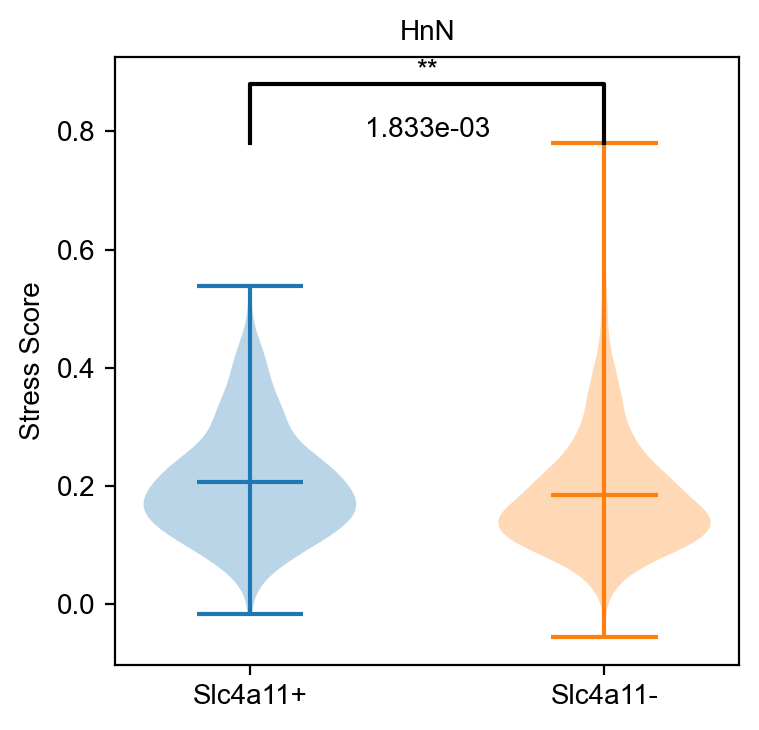

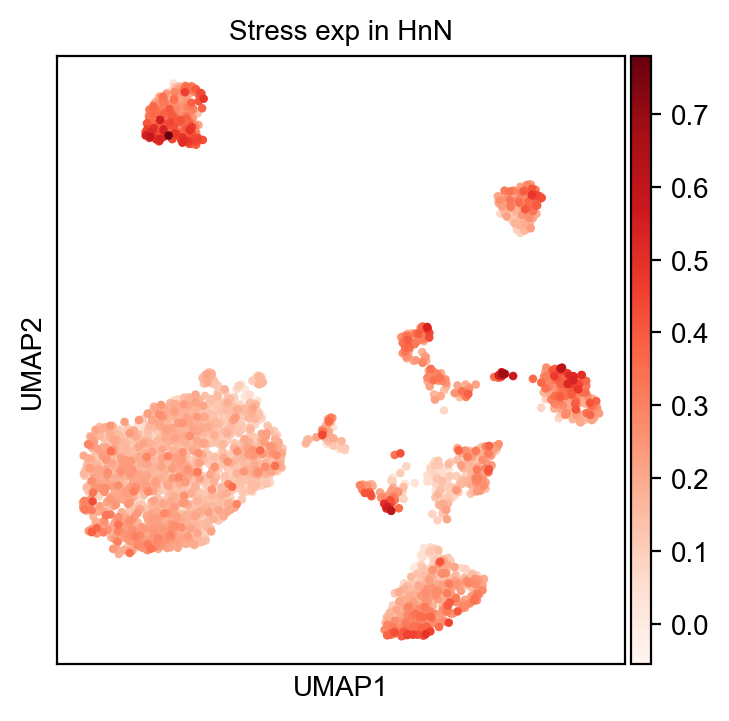

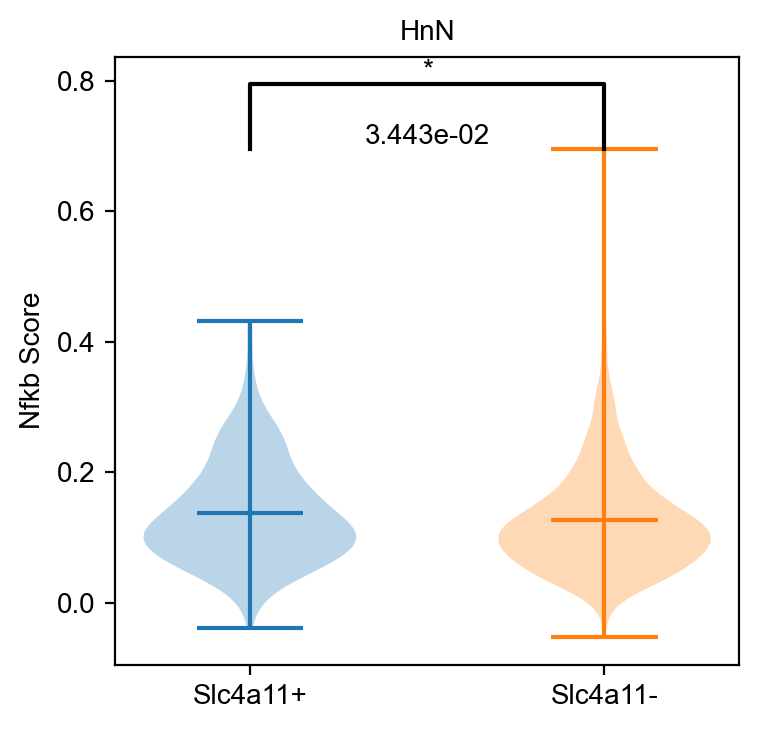

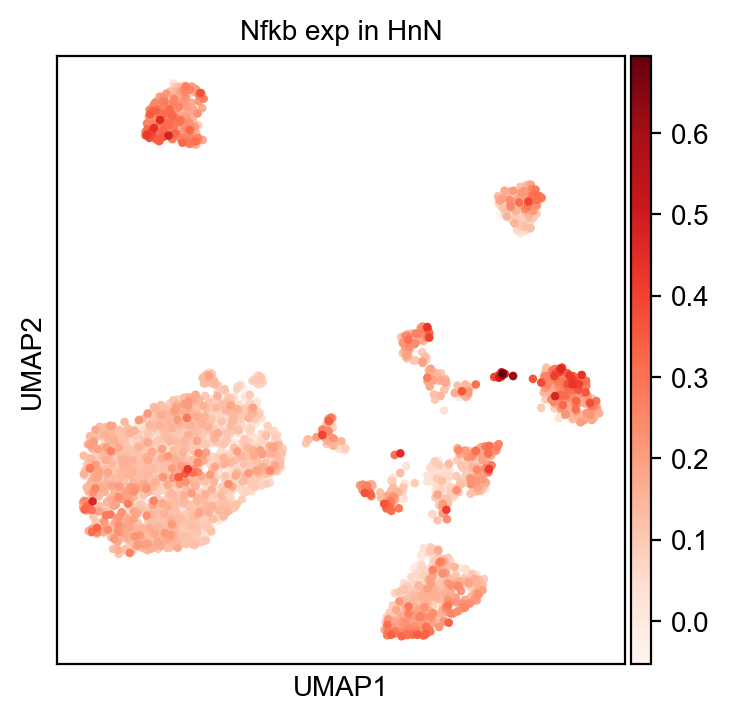

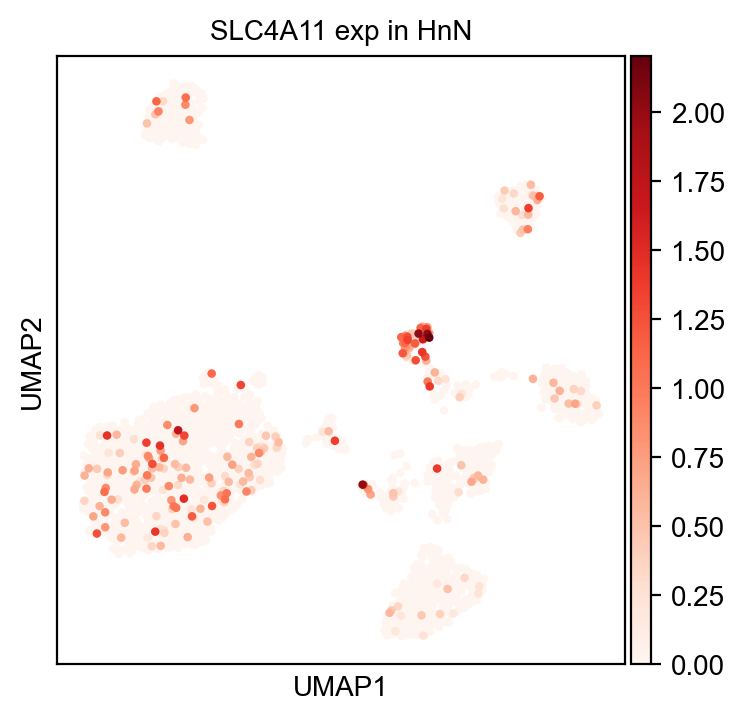

In [93]:
plotBoxGeneUmap(adata, "SLC4A11", colorPlot=["HPCS","Stress","Nfkb"], name="HnN")

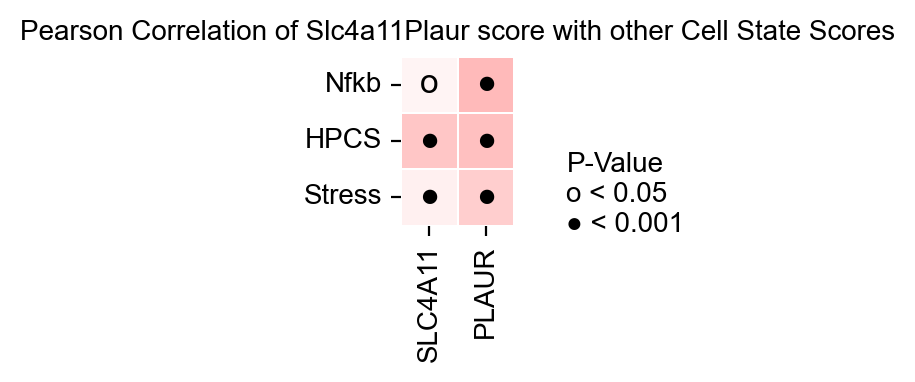

In [85]:
plotCorr("PearCorrGenes", perCorrs, perScores[1,:,:], corrName="Slc4a11Plaur", figsize=(1.5,2))

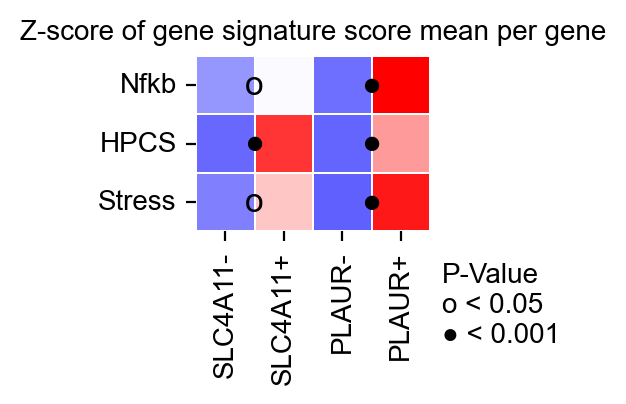

In [91]:
plotZscore(avgScores, dfGS, save=False)